Your Rideshare Bodyguard!... safety report, by Deborah Thomas

<h1 style="color: blue;">Introduction</h1>

## Identifying High-Risk Areas for Rideshare Safety in Kansas City, MO.
Create a data-driven approach to identifying high-risk locations in Kansas City, MO, where drivers and passengers may need extra safety measures. Kansas City, MO is part of Jackson, Clay, Platte, and Cass counties.  

<h1 style="color: blue;">Import Libraries.</h1>

In [552]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdfplumber

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings

<h1 style="color: blue;">Read in Dataset.</h1>

- Description of where dataset comes from

Kansas City Open Data Portal – Local government datasets, including crime and incident data. 2019-2024 KCPD combined reports. The dataset comes from [https://data.kcmo.org/Crime/KCPD-Crime-Data-2019-to-2024/egkn-fji8/about_data](https://data.kcmo.org/Crime/KCPD-Crime-Data-2019-to-2024/egkn-fji8/about_data).

Map of the Police Department territories: [View Map of Police Department Territories](https://kcpd.maps.arcgis.com/apps/webappviewer/index.html?id=24c6239af6654e4aa1d9fb196d01ffb2).

These are the neighborhoods of Kansas City, MO: [Wikipedia - Neighborhoods of Kansas City, Missouri](https://en.wikipedia.org/wiki/Neighborhoods_of_Kansas_City,_Missouri).

In [556]:
dtypes = {
    'Description': 'str',
    'City': 'str',
    'Area': 'str',
    'Location': 'str'
}

In [557]:
KS2 = pd.read_csv("../datasets/KCPD_Crime_Data_KC_OpenDataPortal_2019_to_2024_20250403.csv", dtype=dtypes, low_memory=False)

In [558]:
# Suppress all warnings
warnings.filterwarnings("ignore")

In [559]:
display(KS2.head(100))

,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,To_Date,To_Time,Offense,IBRS,Description,...,Area,DVFlag,Involvement,Race,Sex,Age,Fire Arm Used Flag,Location,Age_Range,Geo_Location1
0,190002679,01/21/2019 12:00:00 AM,8:34,NaN,NaN,NaN,NaN,Fraud/Confidence Gam,26A,NaN,...,NaN,U,SUS,W,M,28.0,False,NaN,NaN,POINT (-92.477746617 38.367982746)
1,KC20070693,10/15/2020 12:00:00 AM,9:37,01/01/2016 12:00:00 AM,10:08,NaN,NaN,Sexual Abuse - Juvenile,NaN,NaN,...,OSPD,N,VIC,W,F,NaN,False,NaN,NaN,NaN
2,KC19030380,04/25/2019 12:00:00 AM,20:51,04/25/2019 12:00:00 AM,22:35,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,OSPD,N,ARR CHA SUS,W,F,34.0,False,NaN,NaN,POINT (-94.419408416 39.245010036)
3,KC19044992,06/17/2019 12:00:00 AM,2:57,06/17/2019 12:00:00 AM,2:57,NaN,NaN,Rape - Juvenile,11A,Forcible Rape,...,EPD,N,SUS,B,M,NaN,False,NaN,NaN,POINT (-94.541545037 39.102210418)
4,KC19044691,06/15/2019 12:00:00 AM,17:22,06/15/2019 12:00:00 AM,16:06,NaN,NaN,Stealing – Shoplift,NaN,NaN,...,CPD,N,VIC,NaN,NaN,NaN,False,NaN,NaN,POINT (-94.591899968 39.042694983)
5,190017086,03/28/2019 12:00:00 AM,12:01,NaN,NaN,NaN,NaN,Aggravated Assault (,13A,NaN,...,NaN,U,SUS,U,U,NaN,True,NaN,NaN,POINT (-92.477746617 38.367982746)
6,KC19026582,04/12/2019 12:00:00 AM,9:31,04/08/2019 12:00:00 AM,4:30,NaN,NaN,Stolen Auto,240,Motor Vehicle Theft,...,NaN,N,CMP VIC,W,M,51.0,False,NaN,NaN,POINT (-94.551136007 39.044326017)
7,KC19034091,05/09/2019 12:00:00 AM,13:15,09/17/2018 12:00:00 AM,20:01,NaN,NaN,Forgery,250,Counterfeiting / Forgery,...,NaN,N,VIC,W,F,81.0,False,NaN,NaN,POINT (-94.608049968 38.925709911)
8,KC19046641,06/22/2019 12:00:00 AM,14:10,06/22/2019 12:00:00 AM,18:05,NaN,NaN,Stealing – Shoplift,23C,Shoplifting,...,MPD,N,VIC,NaN,NaN,NaN,False,NaN,NaN,POINT (-94.608049968 38.925709911)
9,KC19073061,09/24/2019 12:00:00 AM,11:06,09/24/2019 12:00:00 AM,11:45,NaN,NaN,City/Municipal Warrant Arrest,NaN,NaN,...,OSPD,N,ARR CHA,W,M,33.0,False,NaN,NaN,POINT (-94.419408416 39.245010036)


In [560]:
print(KS2.shape) 

(522907, 25)


In [561]:
top_reported_counts = KS2.Reported_Date.value_counts().head(15)
print(top_reported_counts)

Reported_Date
01/24/2019 12:00:00 AM    467
09/14/2023 12:00:00 AM    434
01/04/2019 12:00:00 AM    428
08/14/2023 12:00:00 AM    417
07/05/2023 12:00:00 AM    414
01/02/2019 12:00:00 AM    408
09/25/2023 12:00:00 AM    403
07/24/2023 12:00:00 AM    401
07/03/2022 12:00:00 AM    399
01/16/2019 12:00:00 AM    393
06/02/2020 12:00:00 AM    393
01/01/2019 12:00:00 AM    391
02/13/2019 12:00:00 AM    387
08/10/2023 12:00:00 AM    387
10/19/2021 12:00:00 AM    387
Name: count, dtype: int64


In [562]:
KS2.Involvement.value_counts()

top_Involvement_counts = KS2.Involvement.value_counts().head(15)
print(top_Involvement_counts)

Involvement
VIC                251776
SUS                110694
ARR CHA SUS         65386
CMP VIC             38239
VIC SUS              8003
CHA SUS              4907
ARR                  3033
ARR SUS CHA          2945
ARR CHA INA SUS      2919
ARR SUS              2802
SUS CHA              2385
ARR CHA SUS VDR      1874
VIC A02              1530
VIC WIT              1518
VIC A01              1482
Name: count, dtype: int64


In [563]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522907 entries, 0 to 522906
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Report_No           522907 non-null  object 
 1   Reported_Date       522907 non-null  object 
 2   Reported_Time       522907 non-null  object 
 3   From_Date           522827 non-null  object 
 4   From_Time           522807 non-null  object 
 5   To_Date             246508 non-null  object 
 6   To_Time             178837 non-null  object 
 7   Offense             522907 non-null  object 
 8   IBRS                468296 non-null  object 
 9   Description         442795 non-null  object 
 10  Beat                521093 non-null  object 
 11  Address             522888 non-null  object 
 12  City                522866 non-null  object 
 13  Zip Code            478639 non-null  object 
 14  Rep_Dist            416713 non-null  object 
 15  Area                520208 non-nul

- These columns need to be dropped: Report_No, From_Time, To_Date, To_Time, Involvement, Race, Sex, Age, Age_Range.
- These columns need to be converted to datetime: Reported_Date, Reported_Time, From_Date.
- Reported_Date column needs to have 12:00 AM removed because all values have it. 
- Fire Arm Used Flag column naming needs to have spaces removed.

<h1 style="color: blue;">Clean the Data</h1>

- Drop unecessary columns.

In [567]:
columns_to_drop = ['Report_No', 'From_Time', 'To_Date', 'To_Time', 'IBRS', 'Involvement', 'Race', 'Sex', 'Age', 'Age_Range']
KS2 = KS2.drop(columns=columns_to_drop)

In [568]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522907 entries, 0 to 522906
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Reported_Date       522907 non-null  object
 1   Reported_Time       522907 non-null  object
 2   From_Date           522827 non-null  object
 3   Offense             522907 non-null  object
 4   Description         442795 non-null  object
 5   Beat                521093 non-null  object
 6   Address             522888 non-null  object
 7   City                522866 non-null  object
 8   Zip Code            478639 non-null  object
 9   Rep_Dist            416713 non-null  object
 10  Area                520208 non-null  object
 11  DVFlag              522907 non-null  object
 12  Fire Arm Used Flag  522907 non-null  bool  
 13  Location            456405 non-null  object
 14  Geo_Location1       522862 non-null  object
dtypes: bool(1), object(14)
memory usage: 56.4+ MB


'Reported_Date', 'Reported_Time', 'Offense', 'DVFlag', 'Fire Arm Used Flag' are the only columns that have no missing data.

In [570]:
print(KS2.shape)

(522907, 15)


- Drop duplicates

In [572]:
KS2 = KS2.drop_duplicates()

In [573]:
print(KS2.shape) 

(312430, 15)


In [574]:
522907 - 312430

210477

#### 210,477 rows were duplicates and were dropped.

<h3 style="color: blue;">Clean Area Column</h3>

- Look for NaN in Area

In [578]:
nan_entries = KS2[KS2['Area'].isna()]

print("Entries where Area is NaN:")
display(nan_entries.head(5))

Entries where Area is NaN:


,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
0,01/21/2019 12:00:00 AM,8:34,NaN,Fraud/Confidence Gam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,False,NaN,POINT (-92.477746617 38.367982746)
5,03/28/2019 12:00:00 AM,12:01,NaN,Aggravated Assault (,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,True,NaN,POINT (-92.477746617 38.367982746)
6,04/12/2019 12:00:00 AM,9:31,04/08/2019 12:00:00 AM,Stolen Auto,Motor Vehicle Theft,NaN,4500 S BENTON,KANSAS CITY,64130,NaN,NaN,N,False,NaN,POINT (-94.551136007 39.044326017)
7,05/09/2019 12:00:00 AM,13:15,09/17/2018 12:00:00 AM,Forgery,Counterfeiting / Forgery,533,10700 STATE LINE RD,KANSAS CITY,64114,NaN,NaN,N,False,NaN,POINT (-94.608049968 38.925709911)
16,03/14/2019 12:00:00 AM,12:27,03/06/2019 12:00:00 AM,Misc Violation,NaN,NaN,8611 21ST,KANSAS CITY,64126,NaN,NaN,U,False,NaN,POINT (-94.483472004 39.083929001)


- Change NaN, in Area, to 'Unknown'

In [580]:
KS2['Area'] = KS2['Area'].fillna('Unknown')

- Inspect police department territories.

In [582]:
area_counts = KS2['Area'].value_counts().reset_index()
area_counts.columns = ['Area', 'Count']
print(area_counts)

      Area  Count
0      CPD  87352
1      EPD  74334
2      MPD  56777
3      SPD  34250
4      SCP  28540
5      NPD  26861
6     OSPD   2668
7  Unknown   1636
8      PD1     11
9     SCPD      1


In [583]:
filtered_df = KS2[KS2['Area'] == 'PD1']

display(filtered_df)

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
30791,03/21/2019 12:00:00 AM,13:27,06/24/2016 12:00:00 AM,Stealing From Auto,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,N,False,NaN,POINT (-94.58311 39.10344)
68754,01/17/2019 12:00:00 AM,18:44,01/11/2019 12:00:00 AM,Statutory Rape,NaN,999,9900 S UNKNOWN ST,KANSAS CITY,NaN,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
80945,03/02/2019 12:00:00 AM,12:36,03/01/2019 12:00:00 AM,Credit/Debit/ATM Car,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
82702,02/13/2019 12:00:00 AM,16:18,01/01/2019 12:00:00 AM,Stealing from Buildi,NaN,999,1000 BERKLEY PKWY,KANSAS CITY,64120,PKC000,PD1,U,False,1000 BERKLEY PKWY\nKANSAS CITY 64120\n(39.1151...,POINT (-94.572775985 39.115939992)
82981,01/28/2019 12:00:00 AM,9:50,01/24/2019 12:00:00 AM,Credit/Debit/ATM Car,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
83061,03/07/2019 12:00:00 AM,8:24,03/06/2019 12:00:00 AM,Fraud/Confidence Gam,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
85424,02/01/2019 12:00:00 AM,16:00,01/18/2019 12:00:00 AM,Identity Theft,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
86042,03/18/2019 12:00:00 AM,8:00,03/11/2019 12:00:00 AM,Credit/Debit/ATM Car,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)
89317,02/26/2019 12:00:00 AM,11:20,02/26/2019 12:00:00 AM,Stealing From Auto,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,99999,PKC000,PD1,N,False,NaN,POINT (-94.58311 39.10344)
96432,02/17/2019 12:00:00 AM,2:14,02/16/2019 12:00:00 AM,Stealing From Auto,NaN,999,9999 S UNKNOWN ST,KANSAS CITY,NaN,PKC000,PD1,U,False,NaN,POINT (-94.58311 39.10344)


### Kansas City, MO Divisions
- **CPD** (Central Police Department, located in the center west. Includes West Kansas City, MO)
- **EPD** (East Patrol, located in the center east. Includes East Kansas City, MO)
- **MPD** (Metro Police Department, located in the center south)
- **SPD** (South Patrol Division)
- **SCP** (Shoal Creek Police Department, located in the Northeast)
- **NPD** (North Police Department, located in the Northwest. Includes Wetherby Lake, Parkville, Gladstone, North Kansas City)

- **SCPD** Typo. Needs to change to 'SCP'

- **OSPD** (located in the town of Liberty)
- **PD1** Typo. Looking at the addresses, BERKLEY PKWY is located in the CPD district. Changing 'PD1' to 'CPD'.


https://data.kcmo.org/dataset/Police-Divisions/pxe5-449t

- change PD1 to CPD

In [586]:
KS2.loc[KS2['Area'] == 'PD1', 'Area'] = 'CPD'

- change SCPD to SCP

In [588]:
KS2.loc[KS2['Area'] == 'SCPD', 'Area'] = 'SCP'

In [589]:
KS2.Area.value_counts()

Area
CPD        87363
EPD        74334
MPD        56777
SPD        34250
SCP        28541
NPD        26861
OSPD        2668
Unknown     1636
Name: count, dtype: int64

In [590]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312430 entries, 0 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Reported_Date       312430 non-null  object
 1   Reported_Time       312430 non-null  object
 2   From_Date           312389 non-null  object
 3   Offense             312430 non-null  object
 4   Description         255996 non-null  object
 5   Beat                311344 non-null  object
 6   Address             312424 non-null  object
 7   City                312410 non-null  object
 8   Zip Code            286082 non-null  object
 9   Rep_Dist            247217 non-null  object
 10  Area                312430 non-null  object
 11  DVFlag              312430 non-null  object
 12  Fire Arm Used Flag  312430 non-null  bool  
 13  Location            272151 non-null  object
 14  Geo_Location1       312409 non-null  object
dtypes: bool(1), object(14)
memory usage: 36.1+ MB


Area now no longer has missing values.

<h3 style="color: blue;">Clean City Column</h3>

In [593]:
KS2.City.value_counts()

City
KANSAS CITY                 309261
LIBERTY                        594
INDEPENDENCE                   366
PLATTE CITY                    245
GRANDVIEW                      215
LEES SUMMIT                    140
INDEP                          137
RAYTOWN                        128
KANAS CITY                     112
GLADSTONE                       87
NORTH KANSAS CITY               84
BLUE SPRINGS                    80
BELTON                          79
RIVERSIDE                       61
NKC                             50
KANSAS                          45
HARRISONVILLE                   44
SUGAR CREEK                     34
KCMO                            27
KANSA CITY                      25
KASNAS CITY                     24
OVERLAND PARK                   24
RAYMORE                         22
KCK                             19
LEE'S SUMMIT                    17
LEE SUMMIT                      17
KC                              15
CLAYCOMO                        15
PLEASANT VALLEY

- Check for NaN

In [595]:
nan_citycount = KS2['City'].isna().sum()
print(f"Number of NaN values in 'City': {nan_citycount}")

Number of NaN values in 'City': 20


In [596]:
nan_city_rows = KS2[KS2['City'].isna()]
print("Rows with NaN values in 'City':")
display(nan_city_rows)

Rows with NaN values in 'City':


,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
0,01/21/2019 12:00:00 AM,8:34,NaN,Fraud/Confidence Gam,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,False,NaN,POINT (-92.477746617 38.367982746)
5,03/28/2019 12:00:00 AM,12:01,NaN,Aggravated Assault (,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,True,NaN,POINT (-92.477746617 38.367982746)
44,01/21/2019 12:00:00 AM,8:34,NaN,Forgery,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,False,NaN,POINT (-92.477746617 38.367982746)
63,02/19/2019 12:00:00 AM,12:57,NaN,Forgery,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,False,NaN,POINT (-92.477746617 38.367982746)
733,02/19/2019 12:00:00 AM,12:57,NaN,Fraud/Confidence Gam,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,False,NaN,POINT (-92.477746617 38.367982746)
1982,03/29/2019 12:00:00 AM,21:43,03/29/2019 12:00:00 AM,Legacy Incident Report/Arrest,NaN,112,1100 LOCUST ST,NaN,NaN,NaN,CPD,N,False,"1100 LOCUST ST\n(37.895369, -122.061186)",POINT (-92.325135037 38.949202983)
2065,03/19/2019 12:00:00 AM,17:46,03/15/2019 12:00:00 AM,Stealing – Shoplift,Theft From Building,422,1600 NW 88TH ST,NaN,NaN,NaN,NPD,N,False,"1600 NW 88TH ST\n(39.2548, -94.599)",POINT (-94.598896007 39.254440004)
2101,03/27/2019 12:00:00 AM,22:05,03/23/2019 12:00:00 AM,Stealing from Auto (Auto Part or Accessory),Theft From Motor Vehicle,113,300 W 22ND ST,NaN,NaN,NaN,CPD,N,False,"300 W 22ND ST\n(41.847595, -87.927551)",POINT (-94.588031971 39.086729982)
2205,04/23/2019 12:00:00 AM,16:07,04/22/2019 12:00:00 AM,Stealing from Auto (Auto Part or Accessory),Theft of Vehicle Parts and Accessories,NaN,2500 MADISON,NaN,NaN,NaN,Unknown,N,False,NaN,POINT (-94.595492033 39.081925014)
4168,03/28/2019 12:00:00 AM,12:46,NaN,Agg Assault - Drive-,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,U,True,NaN,POINT (-92.477746617 38.367982746)


- Change City to 'Unknown' if City is NaN and Address is Nan

In [598]:
KS2.loc[KS2['City'].isna() & KS2['Address'].isna(), 'City'] = 'Unknown'

In [599]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312430 entries, 0 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Reported_Date       312430 non-null  object
 1   Reported_Time       312430 non-null  object
 2   From_Date           312389 non-null  object
 3   Offense             312430 non-null  object
 4   Description         255996 non-null  object
 5   Beat                311344 non-null  object
 6   Address             312424 non-null  object
 7   City                312416 non-null  object
 8   Zip Code            286082 non-null  object
 9   Rep_Dist            247217 non-null  object
 10  Area                312430 non-null  object
 11  DVFlag              312430 non-null  object
 12  Fire Arm Used Flag  312430 non-null  bool  
 13  Location            272151 non-null  object
 14  Geo_Location1       312409 non-null  object
dtypes: bool(1), object(14)
memory usage: 36.1+ MB


- If Address is NaN, ZipCode is NaN, Location is NaN, then drop row.

In [601]:
# Drop rows where Address, Zip Code, and Location are all NaN
KS2 = KS2.dropna(subset=['Address', 'Beat', 'Zip Code', 'Location'], how='all')

- Look for typos in City

In [603]:
city_counts = KS2['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Display all rows
pd.set_option('display.max_rows', None)  # Show all rows in the output
print(city_counts)

                         City   Count
0                 KANSAS CITY  309261
1                     LIBERTY     594
2                INDEPENDENCE     366
3                 PLATTE CITY     245
4                   GRANDVIEW     215
5                 LEES SUMMIT     140
6                       INDEP     137
7                     RAYTOWN     128
8                  KANAS CITY     112
9                   GLADSTONE      87
10          NORTH KANSAS CITY      84
11               BLUE SPRINGS      80
12                     BELTON      79
13                  RIVERSIDE      61
14                        NKC      50
15                     KANSAS      45
16              HARRISONVILLE      44
17                SUGAR CREEK      34
18                       KCMO      27
19                 KANSA CITY      25
20                KASNAS CITY      24
21              OVERLAND PARK      24
22                    RAYMORE      22
23                        KCK      19
24               LEE'S SUMMIT      17
25          

There are some typos in the City names.

In [605]:
# Correct the values in the 'City' column
KS2['City'] = KS2['City'].replace({
    'KANAS CITY': 'KANSAS CITY',
    'KANSAS CITHY': 'KANSAS CITY',
    'KANSAS CIITY': 'KANSAS CITY',
    'KANNSAS CITY': 'KANSAS CITY',
    'KANSAS': 'KANSAS CITY',
    'KCMO': 'KANSAS CITY',
    'KANSA CITY': 'KANSAS CITY',
    'KANSAS CITYY': 'KANSAS CITY',
    'KANSAS COTY': 'KANSAS CITY',
    'KASNAS CITY': 'KANSAS CITY',
    'KASNAS CITYY': 'KANSAS CITY',
    'KASNAS COTY': 'KANSAS CITY',
    'KANASAS CITY': 'KANSAS CITY',
    'KCMO': 'KANSAS CITY',
    'KC': 'KANSAS CITY',
    'KANSASCITY': 'KANSAS CITY',
    'KANASA CITY': 'KANSAS CITY',
    'KANSAS CITY MISSOURI USA': 'KANSAS CITY',
    'KANSAS CIY': 'KANSAS CITY',
    'KNASAS CITY': 'KANSAS CITY',
    'KANSAS CTY': 'KANSAS CITY',
    'KANSAS CITY MISSOURI': 'KANSAS CITY',
    'KANSAS CITTY': 'KANSAS CITY',
    'KANSAS CIT': 'KANSAS CITY',
    'KANSAS CITYTY': 'KANSAS CITY',
    'KANSAS CITY MO': 'KANSAS CITY',
    'KANSAS ITY': 'KANSAS CITY',
    'KANSAS C ITY': 'KANSAS CITY',
    'KANSAS CITIY': 'KANSAS CITY',
    'KANSASS CITY': 'KANSAS CITY',
    'KANSS CITY': 'KANSAS CITY',
    'KASAS CITY': 'KANSAS CITY',
    'KANSASA CITY': 'KANSAS CITY',
    'KANSSA CITY': 'KANSAS CITY',
    'NORTH KANSAS CITY': 'KANSAS CITY',
    'KANSAAS CITY': 'KANSAS CITY',
    'KAMSAS CITY': 'KANSAS CITY',
    'KKANSAS CITY': 'KANSAS CITY',
    'KANSA SCITY': 'KANSAS CITY',
    'KANSAS CIRT': 'KANSAS CITY',
    'KANSAS CIRTY': 'KANSAS CITY',
    'KANAS': 'KANSAS CITY',
    'KANSAS CITU': 'KANSAS CITY',
    'KANSAS SCITY': 'KANSAS CITY',
    'KASNSAS CITY': 'KANSAS CITY',
    'KA NSAS CITY': 'KANSAS CITY',
    'KNSAS CITY': 'KANSAS CITY',
    'KANSAS CITH': 'KANSAS CITY',
    'KANSAS CTITY': 'KANSAS CITY',
    'KANSAS CIYT': 'KANSAS CITY',
    'KANSAS CITYT': 'KANSAS CITY',
    'KANSAS CITY 64117': 'KANSAS CITY',
    'KANSAS CIRY': 'KANSAS CITY',
    'KANSAS CIT Y ': 'KANSAS CITY',
    'N KANSAS CITY': 'KANSAS CITY',
    'KANSAS CITR': 'KANSAS CITY',
    'KASNAS COTY': 'KANSAS CITY',
    'KANSAS CI TY': 'KANSAS CITY',
    'KANSAS CIT Y': 'KANSAS CITY',
    'KANAS CTIY': 'KANSAS CITY',
    'KANSAS CTIY': 'KANSAS CITY',
    'KAMSAS COTU': 'KANSAS CITY',
    'KNASAS CTIY': 'KANSAS CITY',
    'KANSAS CITYY': 'KANSAS CITY',
    'KANSAS CITHY': 'KANSAS CITY',
    'KANSAS CIITY': 'KANSAS CITY',
    'KANNSAS CITY': 'KANSAS CITY',
    'KANSAS UNIT': 'KANSAS CITY',
    'KCK': 'KANSAS CITY',
    'UNKNOWN': 'KANSAS CITY',
    '1604': 'KANSAS CITY',
    '64114': 'KANSAS CITY',
    '64126': 'KANSAS CITY',
    '64130': 'KANSAS CITY',
    '64155': 'KANSAS CITY',
    '64132': 'KANSAS CITY',
    '64111': 'KANSAS CITY',
    '64108': 'KANSAS CITY',
    '64105': 'KANSAS CITY',
    '64106': 'KANSAS CITY',
    '64123': 'KANSAS CITY',
    
})

In [606]:
#KS2.City.value_counts()
city_counts = KS2['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Display all rows
pd.set_option('display.max_rows', None)  # Show all rows in the output
print(city_counts)

                   City   Count
0           KANSAS CITY  309805
1               LIBERTY     594
2          INDEPENDENCE     366
3           PLATTE CITY     245
4             GRANDVIEW     215
5           LEES SUMMIT     140
6                 INDEP     137
7               RAYTOWN     128
8             GLADSTONE      87
9          BLUE SPRINGS      80
10               BELTON      79
11            RIVERSIDE      61
12                  NKC      50
13        HARRISONVILLE      44
14          SUGAR CREEK      34
15        OVERLAND PARK      24
16              RAYMORE      22
17           LEE SUMMIT      17
18         LEE'S SUMMIT      17
19             CLAYCOMO      15
20      PLEASANT VALLEY      14
21    EXCELSIOR SPRINGS      13
22              LEAWOOD      12
23              JACKSON      10
24            PARKVILLE       7
25            ST JOSEPH       7
26       JEFFERSON CITY       7
27             HARRISON       5
28               OLATHE       5
29              SHAWNEE       5
30      

- Sort alphabetically, to search for more typos:

In [608]:
city_counts = KS2['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
# Sort the DataFrame alphabetically by the 'City' column
city_counts = city_counts.sort_values(by='City')
# Display all rows
pd.set_option('display.max_rows', None)  # Show all rows in the output
print(city_counts)

                   City   Count
58        0VERLAND PARK       1
48                AGNES       2
94             AMAZONIA       1
82            ANN ARBOR       1
142               ATHOL       1
43              ATLANTA       2
127              AUSTIN       1
10               BELTON      79
9          BLUE SPRINGS      80
46          BLUE SUMMIT       2
77        BLUES SPRINGS       1
100        BLUR SPRINGS       1
113         BOLINGBROOK       1
84           BOONEVILLE       1
110           BOONVILLE       1
151       BOWLING GREED       1
147           BRADENTON       1
101         BRATTLEBORO       1
35             BRIGHTON       3
97              BUCKNER       1
30              CAMERON       5
115      CAPE CANAVERAL       1
135      CARUTHERSVILLE       1
123          CEDAR HILL       1
122          CENTERVIEW       1
124             CHICAGO       1
86          CHILLICOTHE       1
19             CLAYCOMO      15
87              CLINTON       1
63     COLORADO SPRINGS       1
45      

In [609]:
filtered_data = KS2[KS2['City'] == 'PL']
# Print the filtered DataFrame
display(filtered_data)

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
81861,03/11/2019 12:00:00 AM,17:41,03/11/2019 12:00:00 AM,Misc Violation,NaN,999,5508 N HOMER WHITE RD,PL,64152,PPX063,OSPD,U,False,"5508 N HOMER WHITE RD\nPL 64152\n(39.194515, -...",POINT (-94.707155998 39.194550006)


Fix more typos in the city names.

In [611]:
KS2['City'] = KS2['City'].replace({
    'INDEP': 'INDEPENDENCE',
    'INDEDPENDENCE': 'INDEPENDENCE',
    'INDEPEDENCE': 'INDEPENDENCE',
    'INDEPENDEANCE': 'INDEPENDENCE',
    'ST. JOSEPH': 'ST JOSEPH',
    'INDPENDENCE': 'INDEPENDENCE',
    'BLUES SPRINGS': 'BLUE SPRINGS',
    'BLUR SPRINGS': 'BLUE SPRINGS',
    'BOONEVILLE': 'BOONVILLE',
    'BOWLING GREED': 'BOWLING GREEN',
    'GLADESTONE': 'GLADSTONE',
    'GLASTONE': 'GLADSTONE',
    'LEE SUMMIT': 'LEES SUMMIT',
    "LEE'S SUMMIT": 'LEES SUMMIT',
    'LEESSUMMIT': 'LEES SUMMIT',
    'NORTHMOORE': 'NORTHMOOR',
    'PLATTE CTY': 'PLATTE CITY',
    'PLATTESBURG': 'PLATTSBURG',
    'ST. JOSEPH': 'ST JOSEPH',
    'ST. LOUIS': 'ST LOUIS',
 })

In [612]:
print(KS2['City'].isna().sum())

14


- Change 14 NaN values to 'Unknown'.

In [614]:
KS2['City'] = KS2['City'].fillna('Unknown')

In [615]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Reported_Date       312424 non-null  object
 1   Reported_Time       312424 non-null  object
 2   From_Date           312389 non-null  object
 3   Offense             312424 non-null  object
 4   Description         255996 non-null  object
 5   Beat                311344 non-null  object
 6   Address             312424 non-null  object
 7   City                312424 non-null  object
 8   Zip Code            286082 non-null  object
 9   Rep_Dist            247217 non-null  object
 10  Area                312424 non-null  object
 11  DVFlag              312424 non-null  object
 12  Fire Arm Used Flag  312424 non-null  bool  
 13  Location            272151 non-null  object
 14  Geo_Location1       312403 non-null  object
dtypes: bool(1), object(14)
memory usage: 36.1+ MB


City column is clean now.

<h3 style="color: blue;">Clean Reported_Date Column</h3>

- Check for NaN rows

In [619]:
nan_Repcount = KS2['Reported_Date'].isna().sum()
print(f"Number of NaN values in 'Reported_Date': {nan_Repcount}")

Number of NaN values in 'Reported_Date': 0


- Look at Value Counts

In [621]:
KS2.Reported_Date.value_counts().head(30)

Reported_Date
08/14/2023 12:00:00 AM    258
07/05/2023 12:00:00 AM    254
07/12/2023 12:00:00 AM    245
07/24/2023 12:00:00 AM    244
06/19/2023 12:00:00 AM    241
09/25/2023 12:00:00 AM    240
02/12/2024 12:00:00 AM    240
01/02/2024 12:00:00 AM    236
06/03/2019 12:00:00 AM    235
08/09/2023 12:00:00 AM    235
08/06/2023 12:00:00 AM    235
08/08/2023 12:00:00 AM    234
09/11/2023 12:00:00 AM    231
07/08/2019 12:00:00 AM    230
09/02/2022 12:00:00 AM    230
07/10/2023 12:00:00 AM    230
07/17/2023 12:00:00 AM    229
07/07/2023 12:00:00 AM    229
07/01/2022 12:00:00 AM    229
08/10/2023 12:00:00 AM    228
06/05/2020 12:00:00 AM    227
09/18/2023 12:00:00 AM    225
08/16/2023 12:00:00 AM    225
11/09/2020 12:00:00 AM    224
07/18/2023 12:00:00 AM    224
08/21/2023 12:00:00 AM    223
07/14/2023 12:00:00 AM    222
09/29/2023 12:00:00 AM    220
10/14/2022 12:00:00 AM    220
05/10/2022 12:00:00 AM    220
Name: count, dtype: int64

- change Reported_Date to date type. Drop the timestamp of 12:00:00 because all rows have it.

In [623]:
KS2['Reported_Date'] = pd.to_datetime(KS2['Reported_Date'].str.replace(" 12:00:00 AM", ""), format='%m/%d/%Y')

In [624]:
# Display the updated DataFrame
print(KS2['Reported_Date'].head())

1   2020-10-15
2   2019-04-25
3   2019-06-17
4   2019-06-15
6   2019-04-12
Name: Reported_Date, dtype: datetime64[ns]


<h3 style="color: blue;">Clean Reported_Time Column</h3>

- Check for NaN

In [627]:
nan_RepTimecount = KS2['Reported_Time'].isna().sum()
print(f"Number of NaN values in 'Reported_Time': {nan_RepTimecount}")

Number of NaN values in 'Reported_Time': 0


- Check for missing values

In [629]:
missing_reported_time_count = KS2['Reported_Time'].isna().sum()
print(f"Number of missing values in 'Reported_Time': {missing_reported_time_count}")

Number of missing values in 'Reported_Time': 0


In [630]:
print(KS2['Reported_Time'].unique())

['9:37' '20:51' '2:57' ... '5:32' '5:13' ':']


- Change to Datetime type

In [632]:
def clean_time_format(time):
    try:
        return pd.to_datetime(time, format='%H:%M', errors='coerce')
    except Exception:
        return pd.NaT  

In [633]:
KS2['Reported_Time'] = KS2['Reported_Time'].str.strip()

- Remove whitespace

In [635]:
KS2['Reported_Time'] = KS2['Reported_Time'].apply(clean_time_format)

- Check unique values again

In [637]:
print(KS2['Reported_Time'].unique())

<DatetimeArray>
['1900-01-01 09:37:00', '1900-01-01 20:51:00', '1900-01-01 02:57:00',
 '1900-01-01 17:22:00', '1900-01-01 09:31:00', '1900-01-01 13:15:00',
 '1900-01-01 14:10:00', '1900-01-01 11:06:00', '1900-01-01 12:46:00',
 '1900-01-01 20:11:00',
 ...
 '1900-01-01 02:34:00', '1900-01-01 04:14:00', '1900-01-01 06:25:00',
 '1900-01-01 05:44:00', '1900-01-01 06:21:00', '1900-01-01 05:21:00',
 '1900-01-01 03:37:00', '1900-01-01 05:32:00', '1900-01-01 05:13:00',
                 'NaT']
Length: 1441, dtype: datetime64[ns]


In [638]:
missing_reported_time_count = KS2['Reported_Time'].isna().sum()
print(f"Number of missing values in 'Reported_Time' after cleaning: {missing_reported_time_count}")

Number of missing values in 'Reported_Time' after cleaning: 3


In [639]:
missing_TimeRows = KS2[KS2['Reported_Time'].isna()]

# Print the rows with missing 'Reported_Time'
print("Rows with missing 'Reported_Time':")
display(missing_TimeRows)

Rows with missing 'Reported_Time':


,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
36852,2019-08-11,NaT,08/11/2019 12:00:00 AM,Stealing – Shoplift,Shoplifting,345,11600 E US 40 HWY,KANSAS CITY,64133,PJ3601,EPD,N,False,NaN,POINT (-94.441099599 39.046482123)
51418,2019-09-29,NaT,09/28/2019 12:00:00 AM,Stealing from Auto (Theft from Auto),Theft From Motor Vehicle,122,1300 W 12 ST,KANSAS CITY,64101,NaN,CPD,N,False,"1300 W 12 ST\nKANSAS CITY 64101\n(39.100752, ...",POINT (-94.600065031 39.100958011)
64842,2019-07-19,NaT,07/19/2019 12:00:00 AM,Stealing – Shoplift,Shoplifting,531,1200 W 136TH ST,KANSAS CITY,64145,NaN,SPD,N,False,1200 W 136TH ST\nKANSAS CITY 64145\n(38.88160...,POINT (-94.606723088 38.881487311)


- Fill with 12:00, so that these rows do not have to be dropped.

In [641]:
KS2['Reported_Time'] = KS2['Reported_Time'].fillna(pd.Timestamp('1900-01-01 12:00:00'))

In [642]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       312424 non-null  datetime64[ns]
 1   Reported_Time       312424 non-null  datetime64[ns]
 2   From_Date           312389 non-null  object        
 3   Offense             312424 non-null  object        
 4   Description         255996 non-null  object        
 5   Beat                311344 non-null  object        
 6   Address             312424 non-null  object        
 7   City                312424 non-null  object        
 8   Zip Code            286082 non-null  object        
 9   Rep_Dist            247217 non-null  object        
 10  Area                312424 non-null  object        
 11  DVFlag              312424 non-null  object        
 12  Fire Arm Used Flag  312424 non-null  bool          
 13  Location            272151 non-nul

Reported_Date column is clean now.

<h3 style="color: blue;">Clean From_Date Column</h3>

- Check for NaN

In [646]:
nan_FromDateCount = KS2['From_Date'].isna().sum()
print(f"Number of NaN values in 'Reported_Time': {nan_FromDateCount}")

Number of NaN values in 'Reported_Time': 35


In [647]:
nan_FromDate_rows = KS2[KS2['From_Date'].isna()]
print("Rows with NaN values in 'From_Date':")
display(nan_FromDate_rows)

Rows with NaN values in 'From_Date':


,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zip Code,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
297,2023-07-21,1900-01-01 17:51:00,NaN,Unfounded,NaN,425,8900 N HAMPTON RD,KANSAS CITY,64153,PP0290,NPD,FALSE,False,POINT (-94.73304996 39.246047695),POINT (-94.73304996 39.246047695)
4894,2019-08-28,1900-01-01 13:11:00,NaN,Receiving Stolen Property,NaN,343,3000 VAN BRUNT S,KANSAS CITY,NaN,NaN,EPD,N,False,NaN,POINT (-94.520866347 39.070814751)
6947,2019-03-11,1900-01-01 08:00:00,NaN,Forcible Sodomy,NaN,112,1100 LOCUST ST,KANSAS CITY,64106,PJ1029,CPD,U,False,NaN,POINT (-94.57741685 39.100885124)
64741,2019-01-28,1900-01-01 14:49:00,NaN,Auto Theft,NaN,425,11000 NW PRAIRIE VIEW RD,KANSAS CITY,64153,PP0227,NPD,U,False,11000 NW PRAIRIE VIEW RD\nKANSAS CITY 64153\n(...,POINT (-94.688702987 39.288415)
66052,2019-03-28,1900-01-01 10:23:00,NaN,Rape,NaN,112,1100 LOCUST ST,KANSAS CITY,64160,PJ1029,CPD,U,False,"1100 LOCUST ST\nKANSAS CITY 64160\n(39.10091,...",POINT (-94.57741685 39.100885124)
67096,2019-01-09,1900-01-01 17:28:00,NaN,Agg Assault - Drive-,NaN,115,2301 HOLMES ST,KANSAS CITY,64106,PJ1938,CPD,U,True,NaN,POINT (-94.575224004 39.084529983)
67564,2019-12-27,1900-01-01 13:17:00,NaN,Recovered Stolen Auto,NaN,121,LEXINGTON and WABASH,KANSAS CITY,NaN,NaN,CPD,N,False,"LEXINGTON and WABASH\nKANSAS CITY\n(39.110923,...",POINT (-94.552420031 39.110940019)
68961,2019-01-09,1900-01-01 17:28:00,NaN,Agg Assault - Drive-,NaN,115,2301 HOLMES ST,KANSAS CITY,64106,PJ1938,CPD,N,True,NaN,POINT (-94.575224004 39.084529983)
70170,2019-02-01,1900-01-01 11:42:00,NaN,Non Aggravated Assau,NaN,111,1125 LOCUST ST,KANSAS CITY,64106,PJ1029,CPD,U,False,"1125 LOCUST ST\nKANSAS CITY 64106\n(39.100621,...",POINT (-94.576770968 39.100111983)
70640,2019-02-04,1900-01-01 14:25:00,NaN,Fraud/Confidence Gam,NaN,999,941 SCOTT AV,KANSAS CITY,66105,PWX001,OSPD,U,False,"941 SCOTT AV\nKANSAS CITY 66105\n(39.088338, -...",POINT (-94.633808981 39.088124018)


- change From_Date to date type. Drop the timestamp of 12:00:00 because all rows have it.

- Borrow date from Reported_Date column to fill in NaN values.

In [650]:
KS2['From_Date'] = KS2['From_Date'].str.replace(" 12:00:00 AM", "")

- Change From_Date to datetime type.

In [652]:
KS2['From_Date'] = pd.to_datetime(KS2['From_Date'], format='%m/%d/%Y', errors='coerce')

- Borrow date from Reported_Date if From_Date is NaN and Reported_Date is not missing.

In [654]:
KS2.loc[KS2['From_Date'].isna() & KS2['Reported_Date'].notna(), 'From_Date'] = KS2['Reported_Date']

In [655]:
KS2.From_Date.value_counts().head(30)

From_Date
2020-05-30    303
2023-08-01    262
2023-06-17    247
2023-09-01    247
2019-04-01    246
2023-09-16    241
2020-01-01    241
2023-07-01    240
2023-06-01    238
2022-07-01    238
2023-07-07    233
2023-09-29    232
2023-08-14    230
2022-09-02    230
2019-06-03    229
2023-10-01    228
2023-08-10    228
2019-11-01    227
2023-09-08    227
2023-07-15    226
2023-07-05    226
2023-01-01    226
2023-07-02    224
2023-07-14    223
2023-07-12    223
2019-01-01    221
2022-05-10    220
2022-10-14    220
2022-08-11    219
2019-10-01    219
Name: count, dtype: int64

In [656]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       312424 non-null  datetime64[ns]
 1   Reported_Time       312424 non-null  datetime64[ns]
 2   From_Date           312424 non-null  datetime64[ns]
 3   Offense             312424 non-null  object        
 4   Description         255996 non-null  object        
 5   Beat                311344 non-null  object        
 6   Address             312424 non-null  object        
 7   City                312424 non-null  object        
 8   Zip Code            286082 non-null  object        
 9   Rep_Dist            247217 non-null  object        
 10  Area                312424 non-null  object        
 11  DVFlag              312424 non-null  object        
 12  Fire Arm Used Flag  312424 non-null  bool          
 13  Location            272151 non-nul

From_Date column is clean now.

<h3 style="color: blue;">Clean Offense Column</h3>

- check for typos:

In [660]:
offense_counts = KS2['Offense'].value_counts().reset_index()
offense_counts.columns = ['Offense', 'Count']

# Sort the DataFrame alphabetically by the 'Offense' column
offense_counts = offense_counts.sort_values(by='Offense')

pd.set_option('display.max_rows', None)  # Show all rows in the output
display(offense_counts)

,Offense,Count
241,5,1
161,Abandonment of a Child,36
32,Abuse of a Child,1852
232,Accidental Drug Over,1
206,Adult Entertainment Violation,3
88,Agg Assault - Domest,388
139,Agg Assault - Drive-,70
71,Aggravated Assault (,534
18,Alcohol Influence Report,4248
163,Animal Abuse/Cruelty,32


listed alphabetically, to see what values can be combined.

- Clean extra white space

In [663]:
KS2['Offense'] = KS2['Offense'].str.strip().replace({'–': '-'}, regex=True)

In [664]:
KS2['Offense'] = KS2['Offense'].str.strip().replace({
    'Stealing - Shoplift': 'Stealing - Shoplifting',
    'Vehicular - Fatality': 'Vehicular – Fatality',
    'auto theft': 'Auto Theft',
    'fraud': 'Fraud / Stealing Through Deceit (Scam/Confidence Game)',
}, regex=True)

In [665]:
KS2['Offense'] = KS2['Offense'].str.replace(r'\s+', ' ', regex=True)  # Replace multiple spaces with a single space

In [666]:
offense_counts = KS2['Offense'].value_counts().reset_index()
offense_counts.columns = ['Offense', 'Count']

# Sort the DataFrame alphabetically by the 'Offense' column
offense_counts = offense_counts.sort_values(by='Offense')

# Display all rows
pd.set_option('display.max_rows', None)  # Show all rows in the output
print(offense_counts.head(30))

                                               Offense  Count
217                                                  5      1
151                             Abandonment of a Child     36
31                                    Abuse of a Child   1852
221                               Accidental Drug Over      1
200                      Adult Entertainment Violation      3
84                                Agg Assault - Domest    388
130                               Agg Assault - Drive-     70
67                                Aggravated Assault (    534
16                            Alcohol Influence Report   4248
153                               Animal Abuse/Cruelty     32
150                                        Animal Bite     37
205                                     Animal Cruelty      2
95                                       Armed Robbery    260
58                                               Arson    674
6                                 Assault (Aggravated)  11689
75   Ass

- Check for Nan

In [668]:
count_offenseNaN = KS2['Offense'].isna().sum()
print(count_offenseNaN)

0


- Check for missing values in Offense column

In [670]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       312424 non-null  datetime64[ns]
 1   Reported_Time       312424 non-null  datetime64[ns]
 2   From_Date           312424 non-null  datetime64[ns]
 3   Offense             312424 non-null  object        
 4   Description         255996 non-null  object        
 5   Beat                311344 non-null  object        
 6   Address             312424 non-null  object        
 7   City                312424 non-null  object        
 8   Zip Code            286082 non-null  object        
 9   Rep_Dist            247217 non-null  object        
 10  Area                312424 non-null  object        
 11  DVFlag              312424 non-null  object        
 12  Fire Arm Used Flag  312424 non-null  bool          
 13  Location            272151 non-nul

Offense column is clean now.

<h3 style="color: blue;">Clean Description Column</h3>

- Check for NaN

In [674]:
count_DescripNaN = KS2['Description'].isna().sum()
print(count_DescripNaN)

56428


In [675]:
KS2['Description'] = KS2['Description'].str.strip()

In [676]:
desc_counts = KS2['Description'].value_counts().reset_index()
desc_counts.columns = ['Description', 'Count']

# Sort the DataFrame alphabetically by the 'Offense' column
desc_counts = desc_counts.sort_values(by='Description')

pd.set_option('display.max_rows', None)  # Show all rows in the output
display(desc_counts)

,Description,Count
4,Aggravated Assault,18916
8,All Other Larceny,12072
9,All Other Offenses,10737
46,Animal Cruelty,33
30,Arson,707
49,Assisting or Promoting Prostitution,27
47,Bad Checks,31
57,Betting / Wagering,2
58,Bribery,1
5,Burglary/Breaking and Entering,14317


In [677]:
# Fill NaN values in the 'Description' column with 'No Description'
KS2['Description'] = KS2['Description'].fillna('No Description')

In [678]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       312424 non-null  datetime64[ns]
 1   Reported_Time       312424 non-null  datetime64[ns]
 2   From_Date           312424 non-null  datetime64[ns]
 3   Offense             312424 non-null  object        
 4   Description         312424 non-null  object        
 5   Beat                311344 non-null  object        
 6   Address             312424 non-null  object        
 7   City                312424 non-null  object        
 8   Zip Code            286082 non-null  object        
 9   Rep_Dist            247217 non-null  object        
 10  Area                312424 non-null  object        
 11  DVFlag              312424 non-null  object        
 12  Fire Arm Used Flag  312424 non-null  bool          
 13  Location            272151 non-nul

Description column is clean now.

<h3 style="color: blue;">Clean Beat Column</h3>

In [681]:
KS2.Beat.value_counts()

Beat
345             10303
113              9691
134              8558
133              8025
112              7502
111              6158
115              6038
312              5900
132              5732
234              5532
121              5267
241              5247
221              5129
422              5057
131              4989
123              4799
242              4716
341              4693
233              4678
635              4506
542              4482
533              4408
342              4367
314              4305
535              4277
232              4269
213              4175
331              4143
641              4093
531              4072
322              3991
543              3956
313              3857
421              3791
534              3783
211              3769
332              3757
323              3748
212              3685
231              3682
642              3652
141              3501
311              3449
532              3422
344              3403
223  

In [682]:
# Fill NaN values in the 'Description' column with 'No Description'
KS2['Beat'] = KS2['Beat'].fillna('Unknown')

In [683]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312424 entries, 1 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       312424 non-null  datetime64[ns]
 1   Reported_Time       312424 non-null  datetime64[ns]
 2   From_Date           312424 non-null  datetime64[ns]
 3   Offense             312424 non-null  object        
 4   Description         312424 non-null  object        
 5   Beat                312424 non-null  object        
 6   Address             312424 non-null  object        
 7   City                312424 non-null  object        
 8   Zip Code            286082 non-null  object        
 9   Rep_Dist            247217 non-null  object        
 10  Area                312424 non-null  object        
 11  DVFlag              312424 non-null  object        
 12  Fire Arm Used Flag  312424 non-null  bool          
 13  Location            272151 non-nul

In [684]:
print(KS2['Beat'].isna().sum())

0


Beat column is clean now.

<h3 style="color: blue;">Clean Address Column</h3>

In [687]:
KS2.Address.value_counts().head(40)

Address
11600  E US 40 HWY        2791
8500  N BOARDWALK AVE     1415
100  E LINWOOD BLVD       1165
11600  E US 40 HWY E      1072
2300  HOLMES ST           1068
2300  E MEYER BLVD        1028
1100  TROOST AVE           935
1700  W 133RD ST           703
8600  WARD PKWY            635
2600  PROSPECT AVE         593
100  E 13TH ST             589
1300  CHERRY ST            557
00  S WATER ST             556
1100  LOCUST ST            513
500  WESTPORT RD           491
3200  N AMERISTAR DR       490
3700  BROADWAY BLVD        482
3800  BROADWAY BLVD        474
8300  N CHURCH RD          419
4400  WORNALL RD           418
7600  PROSPECT AVE         417
4100  BROADWAY BLVD        411
4800  N OAK TRFY           399
00  W PERSHING RD          382
6400  MANCHESTER AVE       375
3100  PROSPECT AVE         372
1800  E FRONT ST           369
8400  N MADISON AVE        368
4000  MILL ST              366
8500  STATE LINE RD        359
2400  GILLHAM RD           355
4300  MAIN ST              345


Address column is clean.

<h3 style="color: blue;">Clean Zip Code Column</h3>

- get rid of space in 'Zip Code' name

In [691]:
KS2.rename(columns={'Zip Code': 'Zipcode'}, inplace=True)

- Remove leading white space

In [693]:
# Convert Zipcode to string and strip whitespace
KS2['Zipcode'] = KS2['Zipcode'].astype(str).str.strip()
print(KS2['Zipcode'].dtype)

object


- Drop rows with nan and 0.

In [695]:
KS2.shape

(312424, 15)

In [696]:
KS2['Zipcode'] = KS2['Zipcode'].replace('nan', np.nan)

In [697]:
KS2['Zipcode'] = KS2['Zipcode'].replace('0', np.nan)

In [698]:
# Drop rows where Zipcode is np.nan
KS2.dropna(subset=['Zipcode'], inplace=True)

In [699]:
KS2.shape

(286082, 15)

In [700]:
312424 - 286082

26342

26,342 rows removed.

In [702]:
KS2.Zipcode.value_counts()

Zipcode
64111        20740
64130        17513
64127        16419
64108        14490
64106        13497
64132        12515
64133        11842
64131        11673
64134        11001
64128        10794
64114         9718
64124         9224
64110         8993
64109         8740
64129         7225
64118         7023
64105         6598
64117         6362
64112         5884
64123         5597
64138         5532
64151         5483
64137         5369
64119         5362
64154         5229
64155         5009
64116         4530
64153         4354
64120         3959
64126         3925
64157         2923
64145         2548
64125         1865
64113         1840
64158         1744
64152         1637
64161         1586
64156         1047
64136          810
64147          730
64102          574
64101          555
64068          518
64139          478
64146          356
64079          205
64030          205
64050          176
64086          131
64055           97
64012           89
64163           82
6414

- Look for Zipcodes of the wrong length, or with alpha characters

In [704]:
# Print rows where 'Zipcode' is equal to 'MO'
filtered_Zipcode_alpha_rows = KS2[KS2['Zipcode'] == 'MO']

display(filtered_Zipcode_alpha_rows)

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zipcode,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
426430,2022-02-09,1900-01-01 06:02:00,2022-02-09,Domestic Violence Property Damage,Vandalism/Destruction of Property,122,600 PARK AVE,KANSAS CITY,MO,PJ0713,CPD,TRUE,False,POINT (-94.55453 39.10522),POINT (-94.554606682 39.105234985)
436036,2022-02-20,1900-01-01 16:07:00,2022-02-20,Stealing from Auto (Auto Part or Accessory),Theft of Vehicle Parts and Accessories,234,8900 WORNALL RD,KANSAS CITY,MO,NaN,MPD,FALSE,False,POINT (-94.59577 38.96663),POINT (-94.595809958 38.966781008)
464929,2022-06-15,1900-01-01 07:56:00,2022-06-15,Burglary (Non-Residential),Burglary/Breaking and Entering,234,8900 WORNALL RD,KANSAS CITY,MO,NaN,MPD,FALSE,False,POINT (-94.59577 38.96663),POINT (-94.595809958 38.966781008)
504861,2022-12-28,1900-01-01 04:41:00,2022-12-28,Domestic Violence Assault (Non-Aggravated),Simple Assault,421,7100 NW 80TH TER,KANSAS CITY,MO,NaN,NPD,FALSE,False,POINT (-94.66177 39.24018),POINT (-94.661673202 39.240237902)


In [705]:
# Change the Zipcode at index 426430 to '64124'
KS2.loc[426430, 'Zipcode'] = '64124'

In [706]:
# Change the Zipcode at index 426430 to '64124'
KS2.loc[436036, 'Zipcode'] = '64114'

In [707]:
# Change the Zipcode at index 426430 to '64124'
KS2.loc[464929, 'Zipcode'] = '64114'

In [708]:
# Change the Zipcode at index 426430 to '64124'
KS2.loc[464929, 'Zipcode'] = '64152'

In [709]:
KS2.loc[504861,'Zipcode'] = '64152'

In [710]:
display(KS2.loc[426430]) 

Reported_Date                        2022-02-09 00:00:00
Reported_Time                        1900-01-01 06:02:00
From_Date                            2022-02-09 00:00:00
Offense                Domestic Violence Property Damage
Description            Vandalism/Destruction of Property
Beat                                                 122
Address                                    600  PARK AVE
City                                         KANSAS CITY
Zipcode                                            64124
Rep_Dist                                          PJ0713
Area                                                 CPD
DVFlag                                              TRUE
Fire Arm Used Flag                                 False
Location                      POINT (-94.55453 39.10522)
Geo_Location1         POINT (-94.554606682 39.105234985)
Name: 426430, dtype: object

In [711]:
#display(KS2.loc[436036]) 

In [712]:
#display(KS2.loc[464929]) 

In [713]:
#display(KS2.loc[464929]) 

- Look for Zipcodes with 'Clay'

In [715]:
# Print rows where 'Zipcode' is equal to 'MO'
filtered_Zipcode_alpha_rows2 = KS2[KS2['Zipcode'] == 'CLAY']

display(filtered_Zipcode_alpha_rows2)

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zipcode,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
200999,2021-03-10,1900-01-01 08:44:00,2021-03-02,Property Damage,Vandalism/Destruction of Property,642,9000 N MONROE AVE,KANSAS CITY,CLAY,NaN,SCP,FALSE,False,NaN,POINT (-94.537028545 39.204654311)


In [716]:
KS2.loc[200999,'Zipcode'] = '64156'

- Look for Zipcodes with more than 5 digits.

In [718]:
filtered_zipcodes1 = KS2[KS2['Zipcode'].astype(str).str.match(r'^\d{6,}$')].sort_values(by='Zipcode')
display(filtered_zipcodes1.head())

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zipcode,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
131996,2020-05-05,1900-01-01 11:49:00,2020-05-05,City/Municipal Warrant Arrest,No Description,999,1900 INDUSTRIAL DR,LIBERTY,640681329,NaN,OSPD,N,False,1900 INDUSTRIAL DR\nLIBERTY 640681329\n(39.25...,POINT (-94.451486009 39.255607315)
105478,2020-02-01,1900-01-01 12:55:00,2020-02-01,Domestic Violence Assault (Non-Aggravated),Simple Assault,211,5100 INDIANA AVE,KANSAS CITY,641303016,NaN,MPD,Y,False,5100 INDIANA AVE\nKANSAS CITY 641303016\n(39....,POINT (-94.545557139 39.033365459)


Find correct Zipcode for the address.
https://tools.usps.com/zip-code-lookup.htm?byaddress

In [720]:
KS2.loc[131996, 'Zipcode']= '64068'

In [721]:
KS2.loc[105478, 'Zipcode']= '64130'

In [722]:
display(KS2.loc[131996]) 

Reported_Date                                       2020-05-05 00:00:00
Reported_Time                                       1900-01-01 11:49:00
From_Date                                           2020-05-05 00:00:00
Offense                                   City/Municipal Warrant Arrest
Description                                              No Description
Beat                                                                999
Address                                             1900  INDUSTRIAL DR
City                                                            LIBERTY
Zipcode                                                           64068
Rep_Dist                                                            NaN
Area                                                               OSPD
DVFlag                                                                N
Fire Arm Used Flag                                                False
Location              1900  INDUSTRIAL DR\nLIBERTY 640681329\n(3

- Look for Zipcodes with only 4 digits.

In [724]:
#Look for Zipcodes with exactly 4 digits, to find typos
filtered_zipcodes = KS2[KS2['Zipcode'].astype(str).str.match(r'^\d{4}$')].sort_values(by='Zipcode')

In [725]:
display(filtered_zipcodes)

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zipcode,Rep_Dist,Area,DVFlag,Fire Arm Used Flag,Location,Geo_Location1
201875,2020-12-21,1900-01-01 21:37:00,2020-12-21,Miscellaneous Investigation,No Description,999,00 BLACK MOUNTAIN RD,BRATTLEBORO,5301,NaN,OSPD,N,False,NaN,POINT (-72.579040613 42.903739042)
463997,2022-05-17,1900-01-01 14:53:00,2022-05-17,Embezzlement,Embezzlement,122,1100 E 9TH ST,KANSAS CITY,6106,NaN,CPD,FALSE,False,POINT (-94.56933 39.10313),POINT (-94.569357007 39.103585989)
211662,2021-05-05,1900-01-01 15:03:00,2021-05-03,Embezzlement,Embezzlement,122,1100 E 9TH ST,KANSAS CITY,6106,NaN,CPD,FALSE,False,POINT (-94.569355 39.103103),POINT (-94.569357007 39.103585989)
132124,2020-07-11,1900-01-01 22:39:00,2020-07-11,Alcohol Influence Report,Driving Under the Influence,133,33 and MAIN,KANSAS CITY,6110,NaN,CPD,N,False,NaN,POINT (-94.583790429 39.086752447)
38564,2019-07-05,1900-01-01 22:06:00,2019-07-05,Financial Exploitation of the Elderly,False Pretenses / Swindle,234,600 W 89TH TER,KANSAS CITY,6114,PJ6266,MPD,N,False,"600 W 89TH TER\nKANSAS CITY 6114\n(38.966212,...",POINT (-94.598499962 38.96640399)
209779,2021-01-27,1900-01-01 11:05:00,2021-01-26,Burglary (Non-Residential),Burglary/Breaking and Entering,531,600 E 99TH ST,KANSAS CITY,6131,NaN,SPD,FALSE,False,POINT (-94.583443 38.948324),POINT (-94.582967039 38.948864983)
496887,2022-09-20,1900-01-01 08:10:00,2022-09-20,Burglary (Non-Residential),Burglary/Breaking and Entering,531,600 E 99TH ST,KANSAS CITY,6131,NaN,SPD,FALSE,False,POINT (-94.58305 38.94831),POINT (-94.582967039 38.948864983)
116262,2020-02-09,1900-01-01 05:48:00,2020-02-09,Stealing from Auto (Theft from Auto),Theft From Motor Vehicle,545,8300 E 105TH TER,KANSAS CITY,6134,PJ6843,SPD,N,False,8300 E 105TH TER\nKANSAS CITY 6134\n(38.93353...,POINT (-94.493388969 38.933692984)
29492,2019-06-01,1900-01-01 20:08:00,2019-06-01,Mental Health/Crisis Intervention Team (CIT) R...,No Description,534,5100 LONGVIEW RD,KANSAS CITY,6137,NaN,SPD,N,False,5100 LONGVIEW RD\nKANSAS CITY 6137\n(38.91653...,POINT (-94.531449012 38.917506984)
444773,2022-04-11,1900-01-01 18:54:00,2022-04-11,Domestic Violence Assault (Non-Aggravated),Simple Assault,421,7700 NW ROANRIDGE RD,KANSAS CITY,6151,NaN,NPD,FALSE,False,POINT (-94.65543 39.23365),POINT (-94.65543256 39.233556023)


Look up correct Zipcode for Address:
https://tools.usps.com/zip-code-lookup.htm?byaddress

In [727]:
KS2['Zipcode'] = KS2['Zipcode'].replace('5301', '05301')

KS2['Zipcode'] = KS2['Zipcode'].replace('6106', '64106')
KS2['Zipcode'] = KS2['Zipcode'].replace('6110', '64111')
KS2['Zipcode'] = KS2['Zipcode'].replace('6114', '64114')
KS2['Zipcode'] = KS2['Zipcode'].replace('6131', '64131')
KS2['Zipcode'] = KS2['Zipcode'].replace('6134', '64134')
KS2['Zipcode'] = KS2['Zipcode'].replace('6137', '64137')
KS2['Zipcode'] = KS2['Zipcode'].replace('6151', '64151')
KS2['Zipcode'] = KS2['Zipcode'].replace('6154', '64154')

KS2['Zipcode'] = KS2['Zipcode'].replace('6410', '64132')
KS2['Zipcode'] = KS2['Zipcode'].replace('6411', '64111')
KS2['Zipcode'] = KS2['Zipcode'].replace('6412', '64112')
KS2['Zipcode'] = KS2['Zipcode'].replace('6413', '64134')

KS2['Zipcode'] = KS2['Zipcode'].replace('6414', '64114')
KS2['Zipcode'] = KS2['Zipcode'].replace('6415', '64152')

KS2['Zipcode'] = KS2['Zipcode'].replace('6418', '64106')
KS2['Zipcode'] = KS2['Zipcode'].replace('6419', '64116')

KS2['Zipcode'] = KS2['Zipcode'].replace('6427', '64127')

KS2['Zipcode'] = KS2['Zipcode'].replace('6431', '64131')
KS2['Zipcode'] = KS2['Zipcode'].replace('6432', '64131')
KS2['Zipcode'] = KS2['Zipcode'].replace('6434', '64134')
KS2['Zipcode'] = KS2['Zipcode'].replace('6438', '64138')

KS2['Zipcode'] = KS2['Zipcode'].replace('6451', '64151')

In [728]:
if '05301' in KS2['Zipcode'].unique():
    print("Zipcode '05301' found.")
else:
    print("Zipcode '05301' not found.")


Zipcode '05301' found.


In [729]:
print(KS2['Zipcode'].unique())

['64068' '64130' '64114' '64133' '64153' '64132' '64161' '64126' '64106'
 '64050' '64055' '64127' '64112' '64128' '64109' '64119' '64138' '64155'
 '64111' '64110' '64117' '64152' '64012' '64123' '64120' '64108' '64116'
 '64131' '64030' '64129' '64134' '64086' '64124' '64157' '64102' '64061'
 '64149' '64118' '64158' '64147' '64151' '64146' '64156' '64105' '64125'
 '66044' '66206' '66160' '66210' '60654' '64052' '64137' '64154' '64014'
 '64145' '64113' '66101' '64136' '64079' '64101' '64054' '64053' '54139'
 '66103' '64121' '64056' '64166' '64015' '64150' '65542' '64139' '64199'
 '63137' '66411' '66203' '64115' '64107' '63016' '64018' '64104' '66109'
 '61133' '64019' '64148' '64122' '65102' '64650' '64024' '61437' '65251'
 '53154' '66064' '66061' '64217' '67801' '66215' '64163' '92240' '64011'
 '66104' '66205' '65153' '66412' '65129' '66211' '64313' '64506' '63440'
 '64218' '64016' '64515' '66012' '63131' '34127' '65802' '64064' '34128'
 '66112' '99999' '64081' '64032' '32920' '63128' '6

- replace NaN with 'Unknown'

In [731]:
KS2['Zipcode'] = KS2['Zipcode'].astype(int)

In [732]:
print(KS2['Zipcode'].isna().sum())

0


Zipcode column is clean.

<h3 style="color: blue;">Clean Rep_Dist Column</h3>

In [735]:
KS2.Rep_Dist.value_counts().head(40)

Rep_Dist
PJ3601    4077
PP0321    1969
PJ4990    1487
PJ2650    1220
PJ1938    1118
PJ1046     934
PJ6174     919
PP0317     891
PC0323     875
PJ7404     873
PJ1177     844
PC1130     774
PC0282     690
PJ1029     664
PJ6566     630
PJ1191     583
PP0285     576
PJ7081     561
PJ5921     533
PC0387     520
PJ2169     515
PC1343     508
PJ5702     475
PJ0375     474
PC0863     471
PJ3792     468
PP0402     463
PJ4889     448
PC1444     437
PJ3045     435
PJ3303     423
PJ3132     422
PJ0218     402
PC0788     401
PJ3226     394
PJ3218     385
PJ3492     378
PC0430     373
PJ1831     370
PJ2572     354
Name: count, dtype: int64

In [736]:
print(KS2.Rep_Dist.isna().sum())

51862


In [737]:
KS2['Rep_Dist'] = KS2['Rep_Dist'].fillna('Unknown')

In [738]:
print(KS2.Rep_Dist.isna().sum())

0


Rep_Dist is now clean.

<h3 style="color: blue;">Clean DVFlag Column</h3>

In [741]:
KS2.DVFlag.value_counts()

DVFlag
FALSE    170180
N         82383
TRUE      12512
Y         11518
U          9489
Name: count, dtype: int64

- replace TRUE with Y, and FALSE with N

In [743]:
KS2['DVFlag'] = KS2['DVFlag'].replace({True: 'Y', False: 'N'})

KS2['DVFlag'] = KS2['DVFlag'].replace({
    'Y': 'Y',
    'TRUE': 'Y',
    'N': 'N',
    'FALSE': 'N',
    'U': 'Unknown'  # or whatever you want for unknowns
})

In [744]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286082 entries, 2 to 522904
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Reported_Date       286082 non-null  datetime64[ns]
 1   Reported_Time       286082 non-null  datetime64[ns]
 2   From_Date           286082 non-null  datetime64[ns]
 3   Offense             286082 non-null  object        
 4   Description         286082 non-null  object        
 5   Beat                286082 non-null  object        
 6   Address             286082 non-null  object        
 7   City                286082 non-null  object        
 8   Zipcode             286082 non-null  int64         
 9   Rep_Dist            286082 non-null  object        
 10  Area                286082 non-null  object        
 11  DVFlag              286082 non-null  object        
 12  Fire Arm Used Flag  286082 non-null  bool          
 13  Location            248754 non-nul

In [745]:
KS2.DVFlag.value_counts()

DVFlag
N          252563
Y           24030
Unknown      9489
Name: count, dtype: int64

In [746]:
DV_length = len(KS2.DVFlag)

In [747]:
dv_yes = KS2['DVFlag'].value_counts().get('Y', 0)  

In [748]:
# Calculate the percentage
percentage_dv = (dv_yes / DV_length) * 100

In [749]:
print(f"The percentage of Domestic Violence instances is {percentage_dv:.2f}%.")

The percentage of Domestic Violence instances is 8.40%.


DVFlag is clean now.

<h3 style="color: blue;">Clean 'Fire Arm Used Flag' Column</h3>

In [752]:
KS2.rename(columns={'Fire Arm Used Flag': 'FireArmUsed'}, inplace=True)

In [753]:
KS2.FireArmUsed.value_counts()

FireArmUsed
False    271299
True      14783
Name: count, dtype: int64

In [754]:
total_incidents = len(KS2['FireArmUsed'])

In [755]:
firearm_incidents = KS2['FireArmUsed'].value_counts().get(True, 0) 

In [756]:
percentage_firearm = (firearm_incidents / total_incidents) * 100

In [757]:
print(f"{percentage_firearm:.2f}% of the incidences involved a firearm.")

5.17% of the incidences involved a firearm.


In [758]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286082 entries, 2 to 522904
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Reported_Date  286082 non-null  datetime64[ns]
 1   Reported_Time  286082 non-null  datetime64[ns]
 2   From_Date      286082 non-null  datetime64[ns]
 3   Offense        286082 non-null  object        
 4   Description    286082 non-null  object        
 5   Beat           286082 non-null  object        
 6   Address        286082 non-null  object        
 7   City           286082 non-null  object        
 8   Zipcode        286082 non-null  int64         
 9   Rep_Dist       286082 non-null  object        
 10  Area           286082 non-null  object        
 11  DVFlag         286082 non-null  object        
 12  FireArmUsed    286082 non-null  bool          
 13  Location       248754 non-null  object        
 14  Geo_Location1  286082 non-null  object        
dtypes: bo

FireArmUsed column is clean now.

In [760]:
KS2.Location.value_counts().head(25)

Location
POINT (-94.44114 39.04643)                                           1010
POINT (-94.441099599 39.046482123)                                    901
POINT (-94.657201087 39.250189469)                                    778
1100  TROOST AVE\nKANSAS CITY 64106\n(39.10068, -94.569846)           453
POINT (-94.583430529 39.068442506)                                    376
2300  E MEYER BLVD\nKANSAS CITY 64132\n(39.007141, -94.559903)        366
2300  HOLMES ST\nKANSAS CITY 64108\n(39.084583, -94.575809)           343
POINT (-94.557774977 39.008867004)                                    315
2600  PROSPECT AVE\nKANSAS CITY 64127\n(39.078772, -94.552412)        280
POINT (-94.576183983 39.084744979)                                    276
100  E LINWOOD BLVD\nKANSAS CITY 64111\n(39.068419, -94.584002)       274
8500  N BOARDWALK AVE\nKANSAS CITY 64154\n(39.252223, -94.655534)     273
POINT (-94.58351 39.06839)                                            270
1700  W 133RD ST\nKANSAS CITY

In [761]:
KS2.Location.isna().sum()

37328

In [762]:
KS2['Location'] = KS2['Location'].fillna('Unknown')

In [763]:
KS2.Location.isna().sum()

0

<h3 style="color: blue;">Clean Geo_Location1 Column</h3>

In [765]:
KS2.Geo_Location1.isna().sum()

0

In [766]:
KS2['Geo_Location1'] = KS2['Geo_Location1'].fillna('Unknown')

In [767]:
KS2.Geo_Location1.isna().sum()

0

In [768]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286082 entries, 2 to 522904
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Reported_Date  286082 non-null  datetime64[ns]
 1   Reported_Time  286082 non-null  datetime64[ns]
 2   From_Date      286082 non-null  datetime64[ns]
 3   Offense        286082 non-null  object        
 4   Description    286082 non-null  object        
 5   Beat           286082 non-null  object        
 6   Address        286082 non-null  object        
 7   City           286082 non-null  object        
 8   Zipcode        286082 non-null  int64         
 9   Rep_Dist       286082 non-null  object        
 10  Area           286082 non-null  object        
 11  DVFlag         286082 non-null  object        
 12  FireArmUsed    286082 non-null  bool          
 13  Location       286082 non-null  object        
 14  Geo_Location1  286082 non-null  object        
dtypes: bo

Geo_Location1 column is clean now.

<h3 style="color: blue;">All columns are clean now.</h3>

<h1 style="color: blue;">Data Visualization</h1>

<h3 style="color: blue;">Look at Domestic Violence, by Area (police beat)</h3>

In [773]:
Area_dv_count = KS2.groupby(['Area', 'DVFlag']).size().unstack(fill_value=0)

In [774]:
# Filter to only keep the 'Unknown' and 'Y' columns
filtered_area_dv_count = Area_dv_count[['Unknown', 'Y']]

In [775]:
# Sort by 'Y' count in descending order
sorted_filtered_area_dv_count = filtered_area_dv_count.sort_values(by='Y', ascending=False)

In [776]:
# Create a third column that sums the 'Y' count and 'Unknown' count
sorted_filtered_area_dv_count['Total'] = sorted_filtered_area_dv_count['Y'] + sorted_filtered_area_dv_count['Unknown']

In [777]:
print(sorted_filtered_area_dv_count)

DVFlag   Unknown     Y  Total
Area                         
EPD         2609  6199   8808
MPD         1744  5800   7544
CPD         2553  4087   6640
SPD         1102  3412   4514
SCP          812  2472   3284
NPD          541  1777   2318
Unknown       79   166    245
OSPD          49   117    166


- The East Police Department (EPD) has the highest amount of Domestic violence incidences.
- The Metro Police Department (MPD) has the 2nd highest amount.
- The Central Police Department (CPD) has the 3rd highest.

<h3 style="color: blue;">Look at various types of incidents, by Zipcode</h3>

Look at Domestic Violence, Use of Firearm, Stealing or Robbery, Harassment or Intimidation, Rape or Sex or Molestation, Assault, Murder or Casualty, Kidnapping or Trafficking, Missing Person

- <h4 style="color: blue;">Domestic Violence.</h1>

In [782]:
zip_dv_count = KS2.groupby(['Zipcode', 'DVFlag']).size().unstack(fill_value=0)

In [783]:
# Check for "Y" (yes)
# Only grad if Zipcode has 500 or more
if 'Y' in zip_dv_count.columns:
    zip_dv_count = zip_dv_count[['Y']]
    # Ensure to filter after selecting 'Y' column
    zip_dv_count = zip_dv_count[zip_dv_count['Y'] >= 500]  
else:
    print("No 'Y' values found in DVFlag.")

In [784]:
# Sort by count (ascending order)
zip_dv_count = zip_dv_count.sort_values(by='Y', ascending=True)

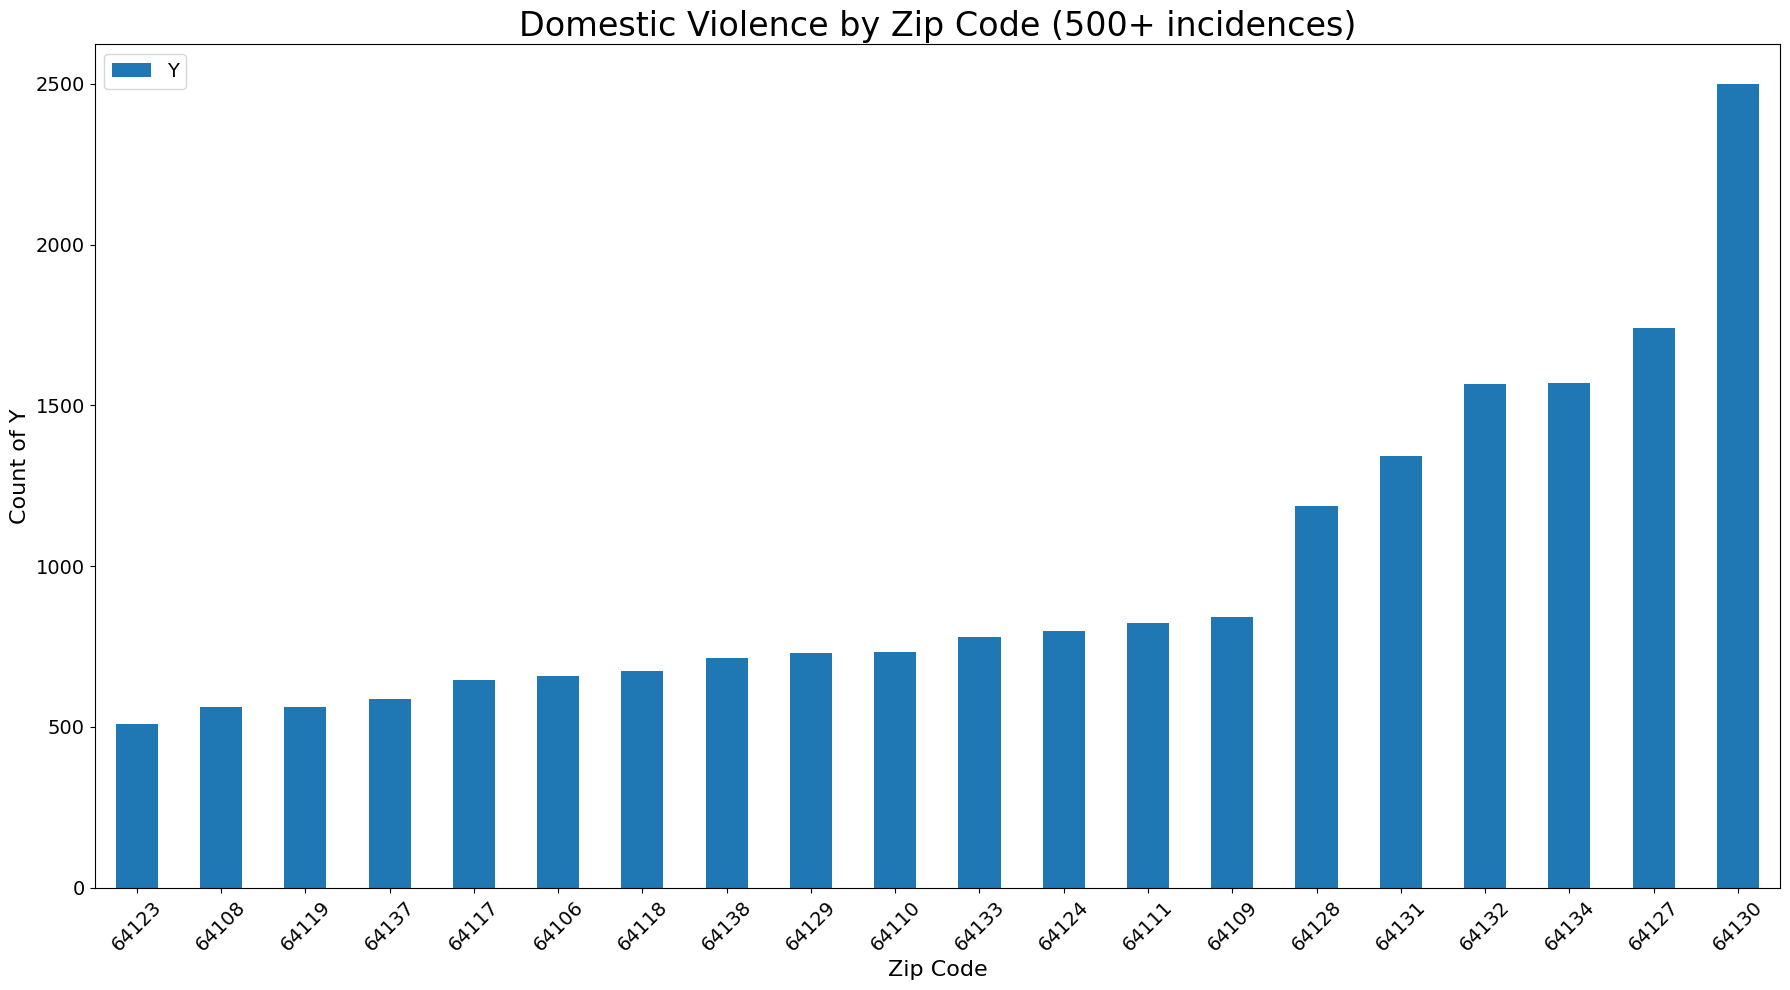

In [785]:
if not zip_dv_count.empty:
    fig, ax = plt.subplots(figsize=(18, 10))  
    ax.clear()
    
    zip_dv_count.plot(kind='bar', stacked=True, ax=ax)
    
    ax.set_title('Domestic Violence by Zip Code (500+ incidences)', fontsize=24) 
    ax.set_xlabel('Zip Code', fontsize=16) 
    ax.set_ylabel('Count of Y', fontsize=16) 
    ax.legend(fontsize=14)
    
    plt.xticks(rotation=45, fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.tight_layout()  
    
    plt.show()

- Highest Domestic Violence incidences... "Unknown" Zipcode.
- 2nd highest ... Zipcode 64130 is in the Metro Police Department beat, in the central south of Kansas City, MO.
- 3rd highest ... Zipcode 64127 is in the Central Police Department beat, in the center west part of Kansas City, MO.
- 4th highest ... Zipcde 64134 is in the Metro Police Department beat.
- 5th highest ... Zipcode 64132 is also in the South Police Department beat.
- 6th highest ... Zipcode 64131 is in the Metro Police Department beat.

Most of the incidence of Domestic Violence is in the Metro Police Department beat, in Zipcode 64130.

- <h4 style="color: blue;">Firearm Used.</h1>

In [789]:
KS2.FireArmUsed.value_counts()

FireArmUsed
False    271299
True      14783
Name: count, dtype: int64

In [790]:
zip_firearm_count = KS2.groupby(['Zipcode', 'FireArmUsed']).size().unstack(fill_value=0)

In [791]:
print(zip_firearm_count.columns)

Index([False, True], dtype='bool', name='FireArmUsed')


In [792]:
# Sort by count (ascending order)
zip_firearm_count = zip_firearm_count.sort_values(by=True, ascending=False)
print(zip_firearm_count.head(10))

FireArmUsed  False  True 
Zipcode                  
64130        15700   1814
64127        15031   1389
64128         9745   1049
64132        11485   1042
64134        10161    852
64124         8419    806
64131        10945    733
64110         8400    593
64111        20210    590
64109         8181    559


In [793]:
# Filter to keep only the rows where FireArmUsed is True
true_firearm_count = zip_firearm_count[True]
print(true_firearm_count.head(30))

Zipcode
64130    1814
64127    1389
64128    1049
64132    1042
64134     852
64124     806
64131     733
64110     593
64111     590
64109     559
64108     474
64106     465
64129     462
64133     455
64123     412
64138     384
64126     356
64114     254
64137     246
64117     199
64118     182
64119     164
64125     156
64116     128
64120     126
64151     111
64105     106
64155      98
64112      77
64147      63
Name: True, dtype: int64


In [794]:
zip_firearm_count = KS2.groupby(['Zipcode', 'FireArmUsed']).size().unstack(fill_value=0)
true_firearm_count = zip_firearm_count[True]

In [795]:
# Filter counts greater than 250
true_firearm_count = true_firearm_count[true_firearm_count > 250]

In [796]:
# Sort the true firearm count in ascending order
true_firearm_count = true_firearm_count.sort_values(ascending=True)

Only show incidences more than 250, so that graph is readable.

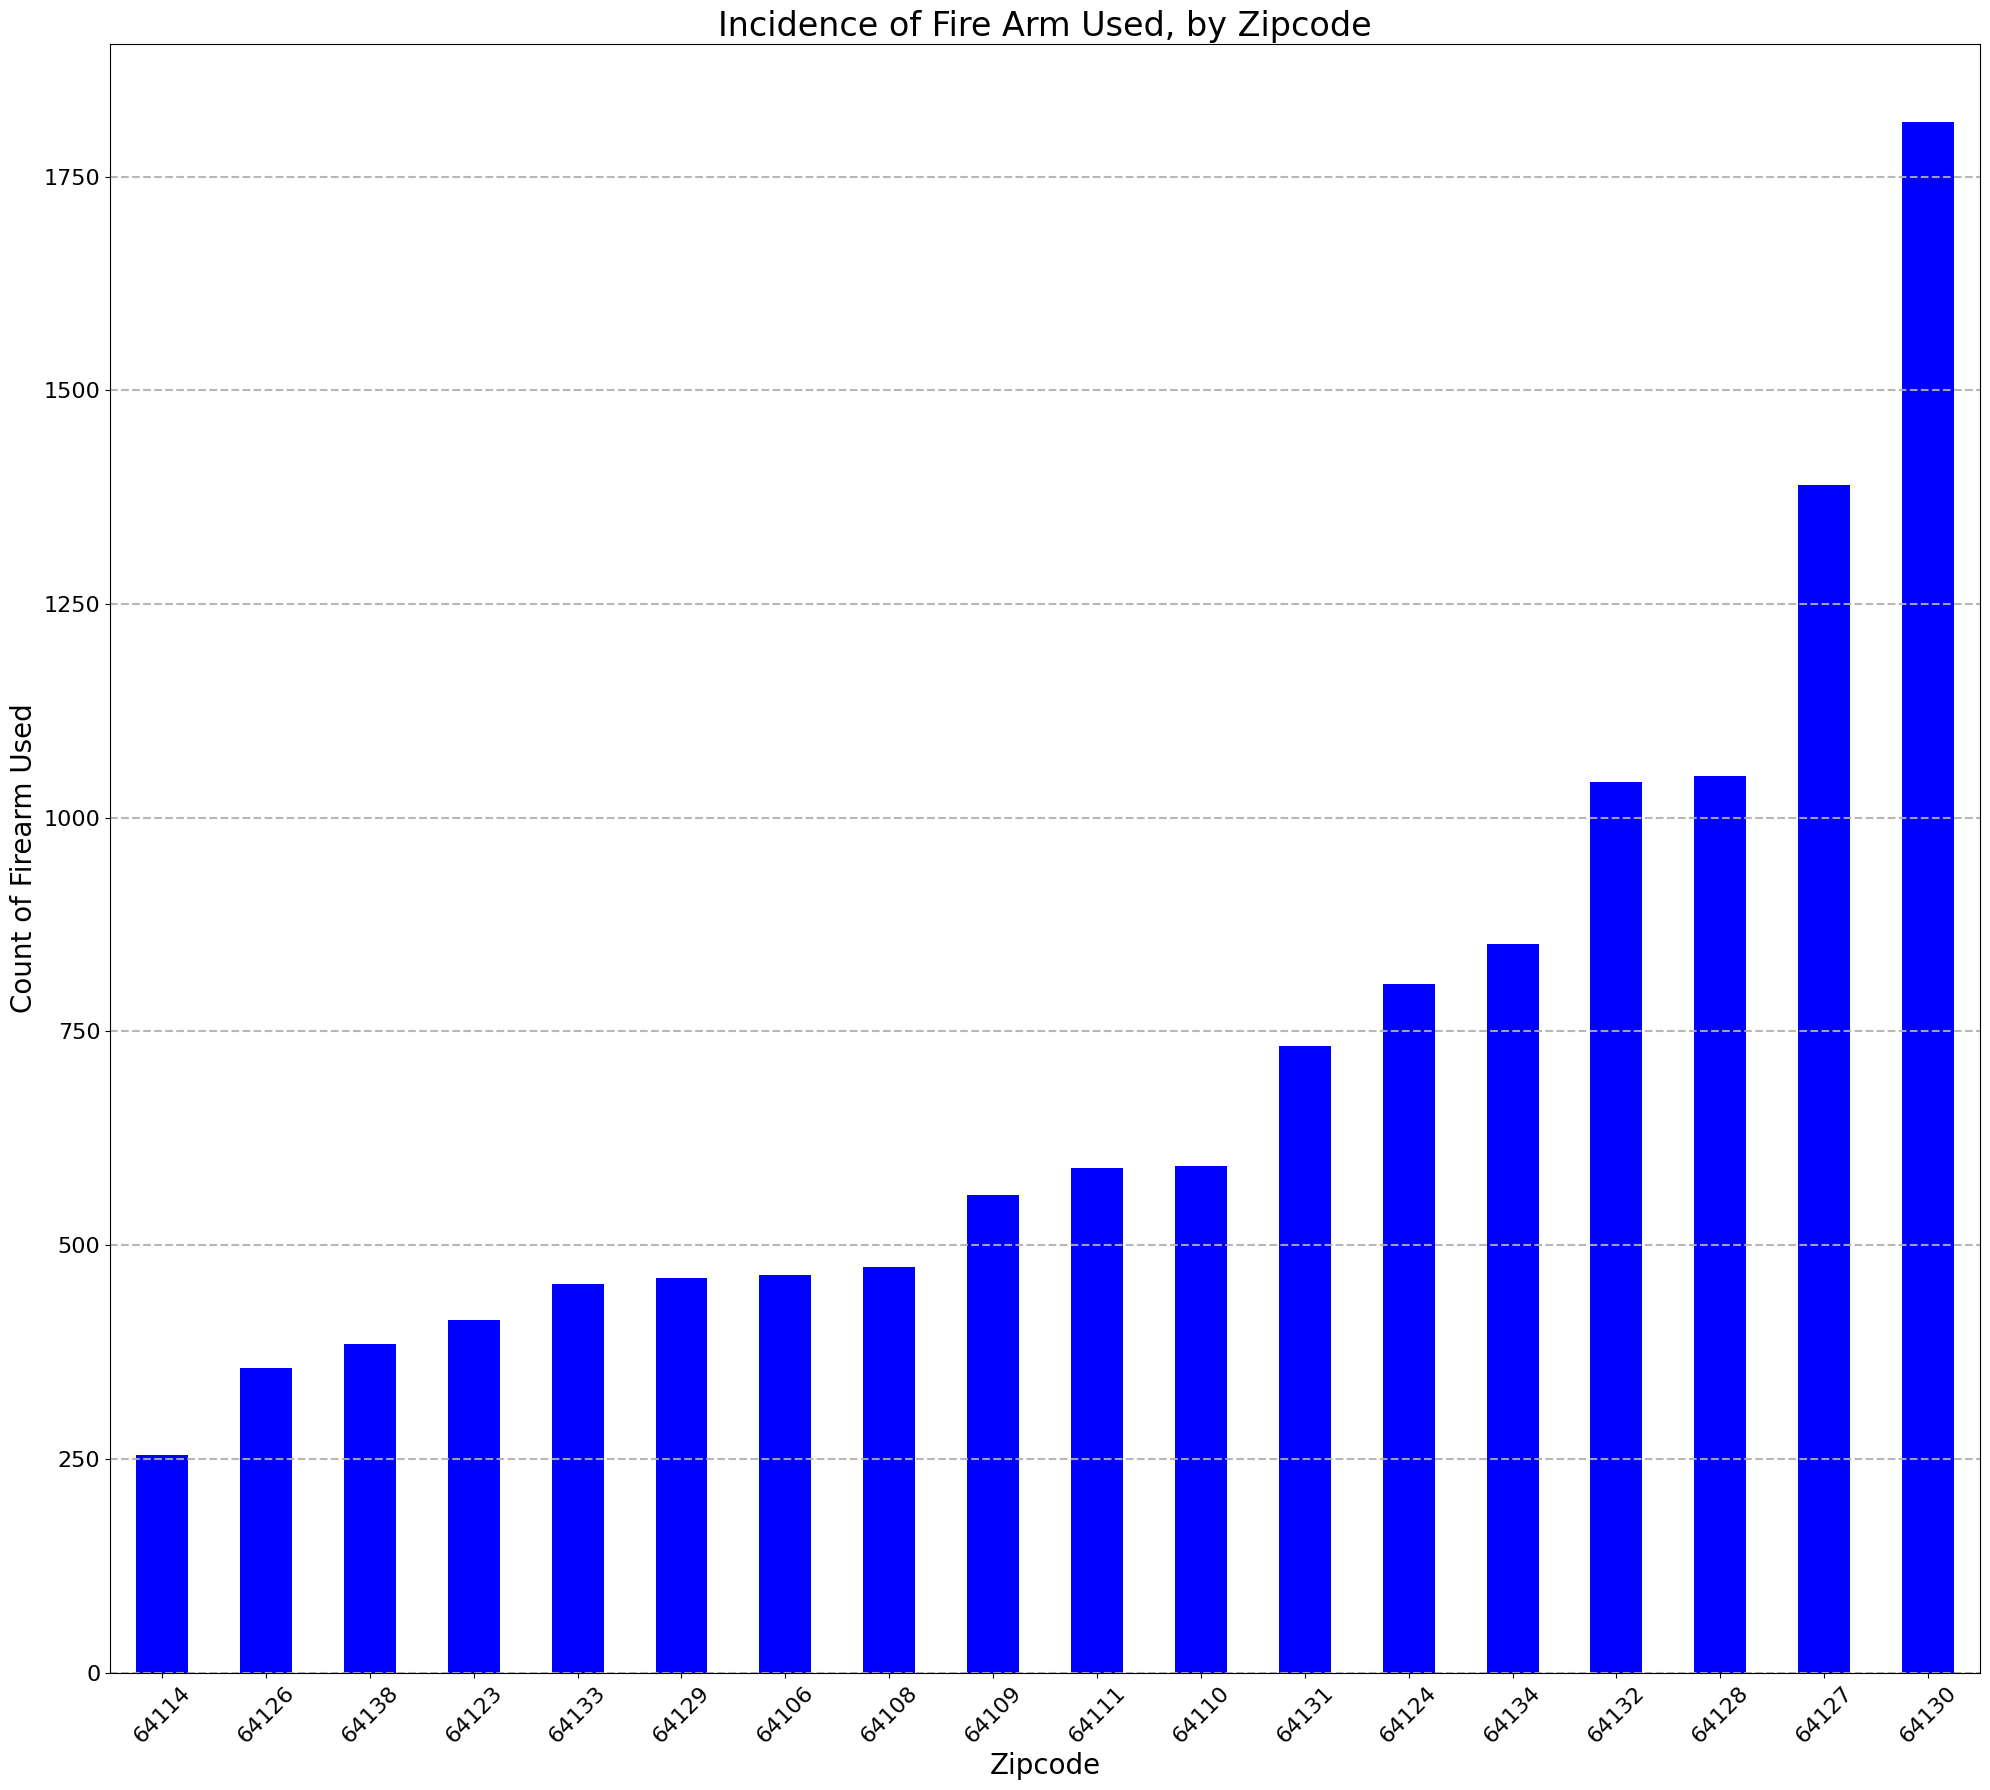

In [798]:
plt.figure(figsize=(20, 18))

true_firearm_count.plot(kind='bar', color='blue')
plt.title('Incidence of Fire Arm Used, by Zipcode', fontsize=24) 
plt.xlabel("Zipcode", fontsize=20) 
plt.ylabel("Count of Firearm Used", fontsize=20) 
plt.xticks(rotation=45, fontsize=16)  
plt.yticks(fontsize=16)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

- The most incidences of Fire Arm Used is from "Unknown" Zipcodes.
- The 2nd most incidences is from Zipcode 64130, in the Metro PD beat.
- The 3rd most incidences is from Zipcode 64127, in the Central PD beat.
- The 4th most incidences is from Zipcode 64128, in the Central PD beat.
- The 5th most incidences is from Zipcode 64132, in the Metro PD beat.
- the 6th most incidences is from Zipcode 64134, in the South PD beat.

Aside from the incidences of Firearm Used, in the "Unknown" Zipcodes, two of the top 5 Zipcodes are in the Matro PD beat, and two are in the Central PD beat.

These Zipcodes were also in the top 5 for incidences of Domestic Violence:
- 64130
- 64127
- 64132
- 64134

Two of these 3 are in the Metro Police Department beat.

- <h4 style="color: blue;">Stealing or Robbery.</h1>

In [804]:
filtered_StealRob_count = KS2[KS2['Offense'].str.contains('Steal|Robbery', case=False)]

In [805]:
# Group by 'Zipcode' and count occurrences of filtered offenses
zip_StealRob_count = filtered_StealRob_count.groupby('Zipcode').size().sort_values(ascending=True)

In [806]:
zip_StealRob_count = zip_StealRob_count[zip_StealRob_count > 50]

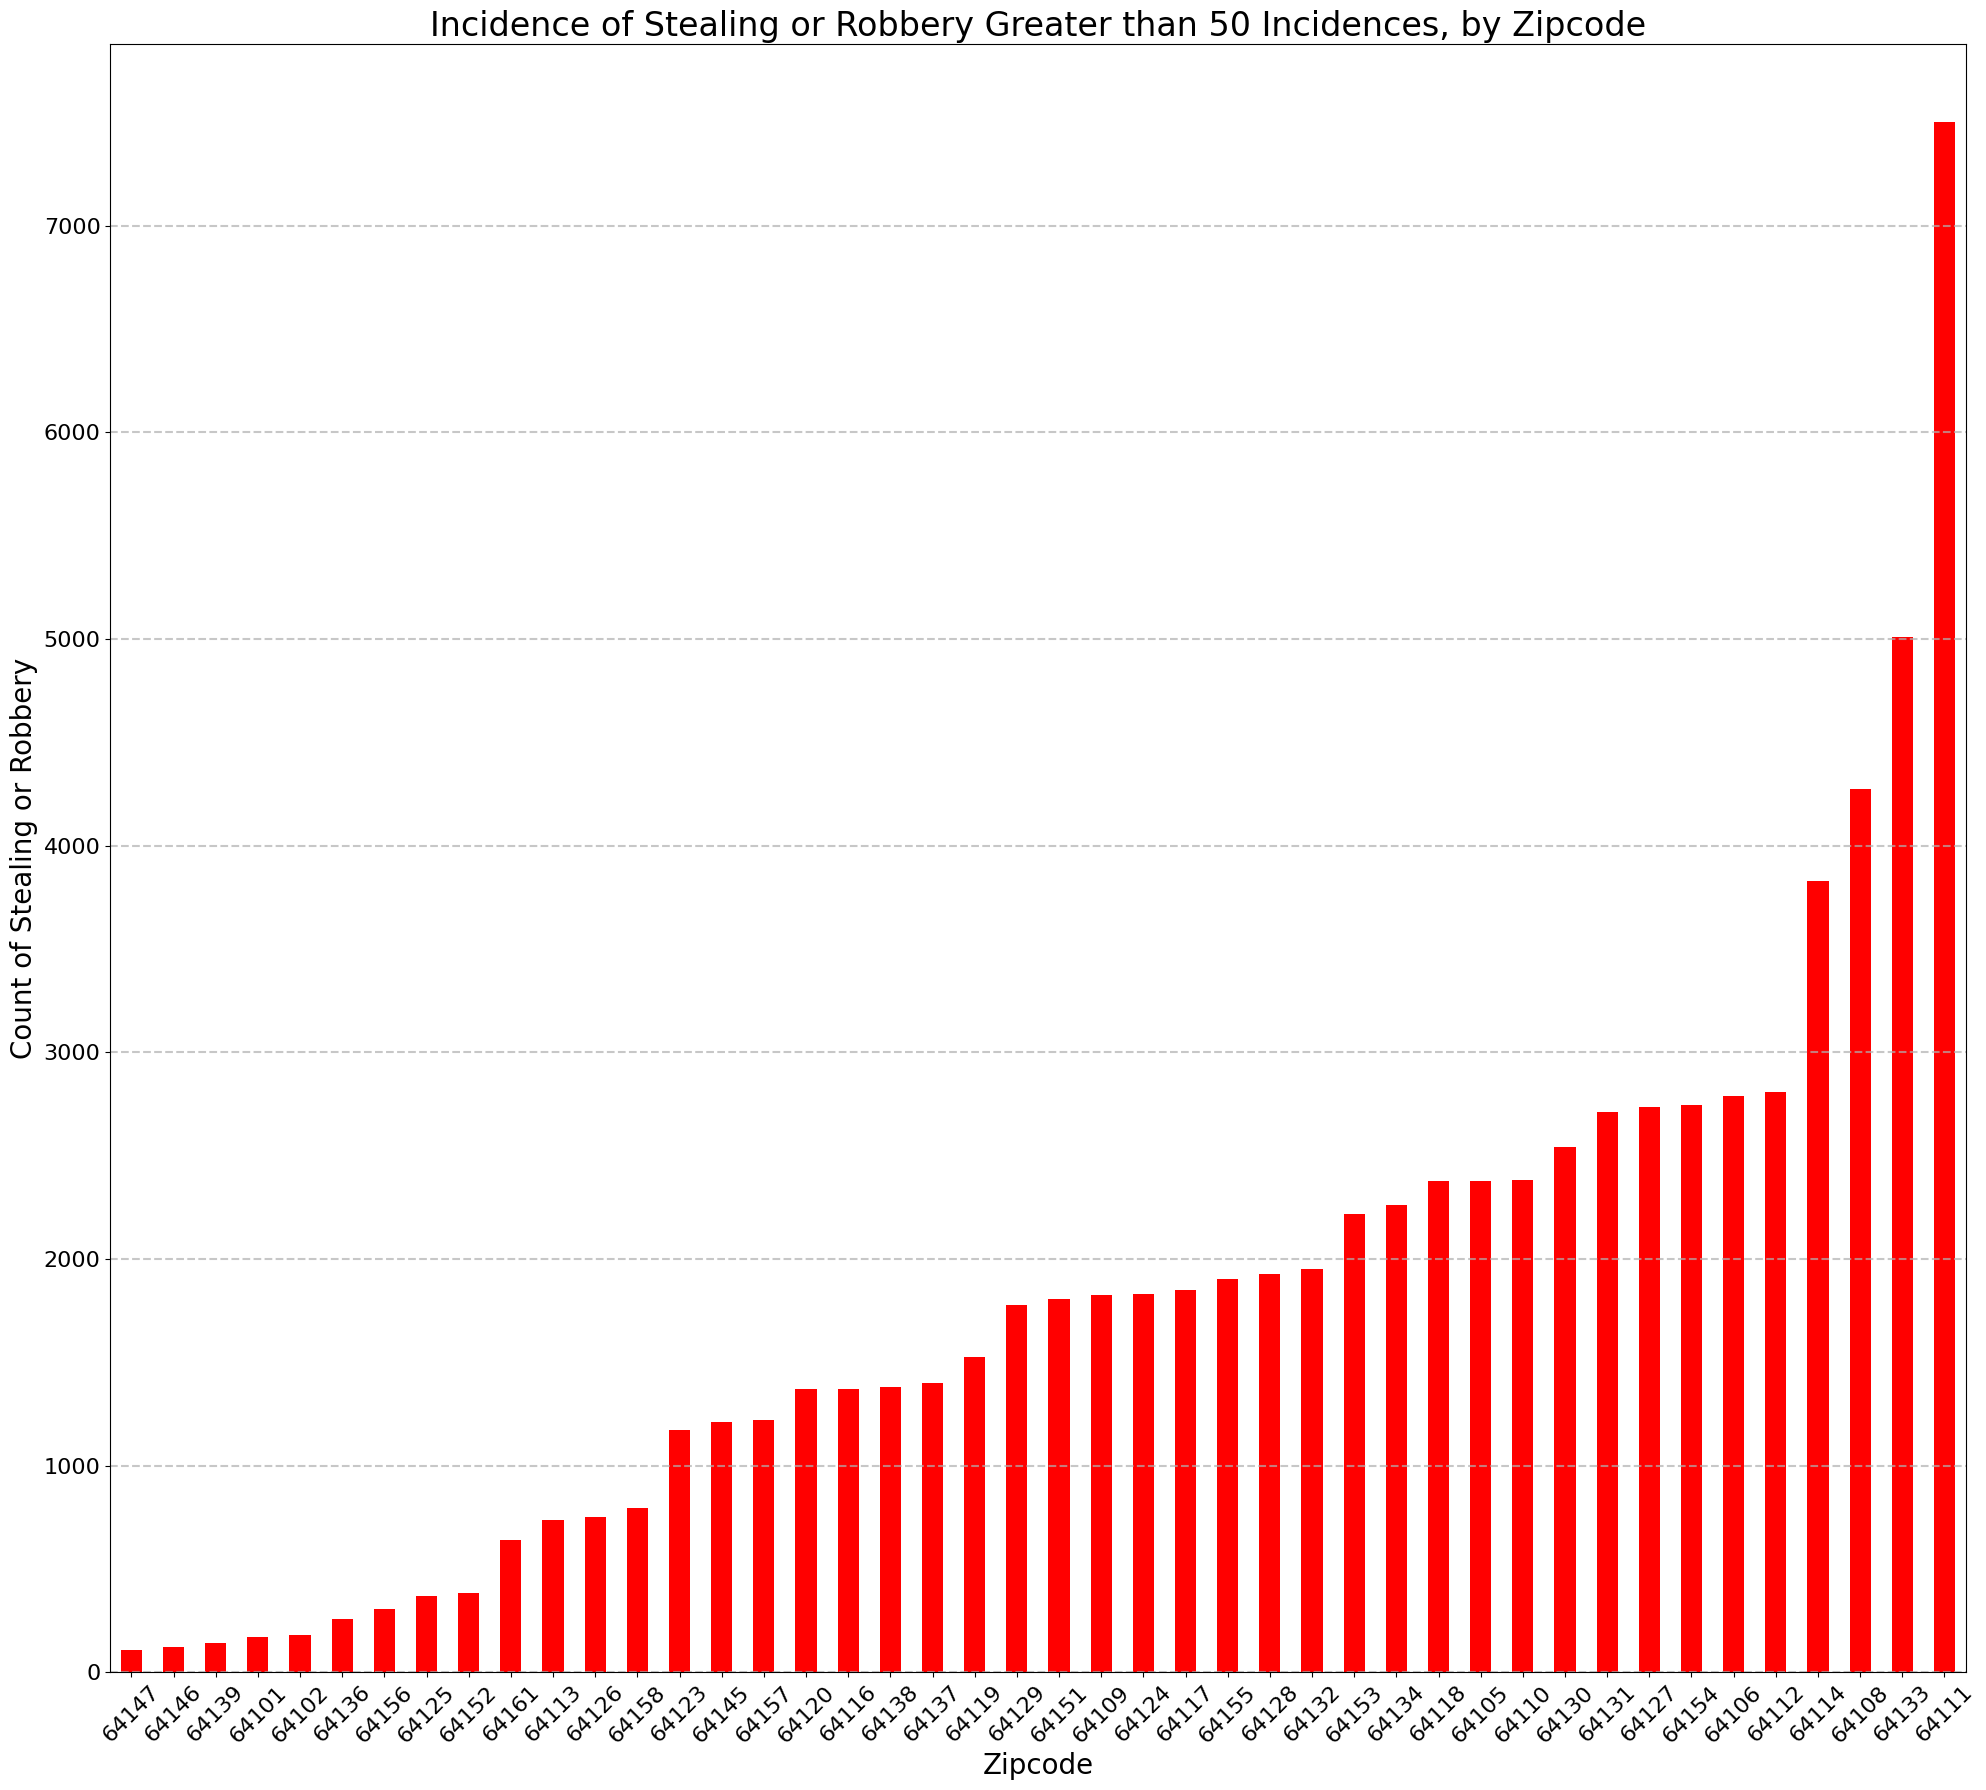

In [807]:
plt.figure(figsize=(20, 18))

zip_StealRob_count.plot(kind='bar', color='red')
plt.title('Incidence of Stealing or Robbery Greater than 50 Incidences, by Zipcode', fontsize=24) 
plt.xlabel("Zipcode", fontsize=20) 
plt.ylabel("Count of Stealing or Robbery", fontsize=20) 
plt.xticks(rotation=45, fontsize=16)  
plt.yticks(fontsize=16)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=1.5) 

plt.show()

These are the Zipcodes with the most incidences of Stealing and Robbery:
- 64111
- 64133
- 64108
- 64114
- 64112

Zipcode 64111 has double the amount of Stealing and Robbery incidences than almost all of the Zipcodes and 3 times the amount than most of the Zipcodes.

- <h4 style="color: blue;">Harassment or Intimidation.</h1>

In [810]:
filtered_HarassIntim_count = KS2[KS2['Offense'].str.contains('Harassment|Intimidation', case=False)]

In [811]:
# Group by 'Zipcode' and count occurrences of filtered offenses
zip_HarassIntim_count = filtered_HarassIntim_count.groupby('Zipcode').size()

In [812]:
zip_HarassIntim_count = zip_HarassIntim_count.sort_values(ascending=True)

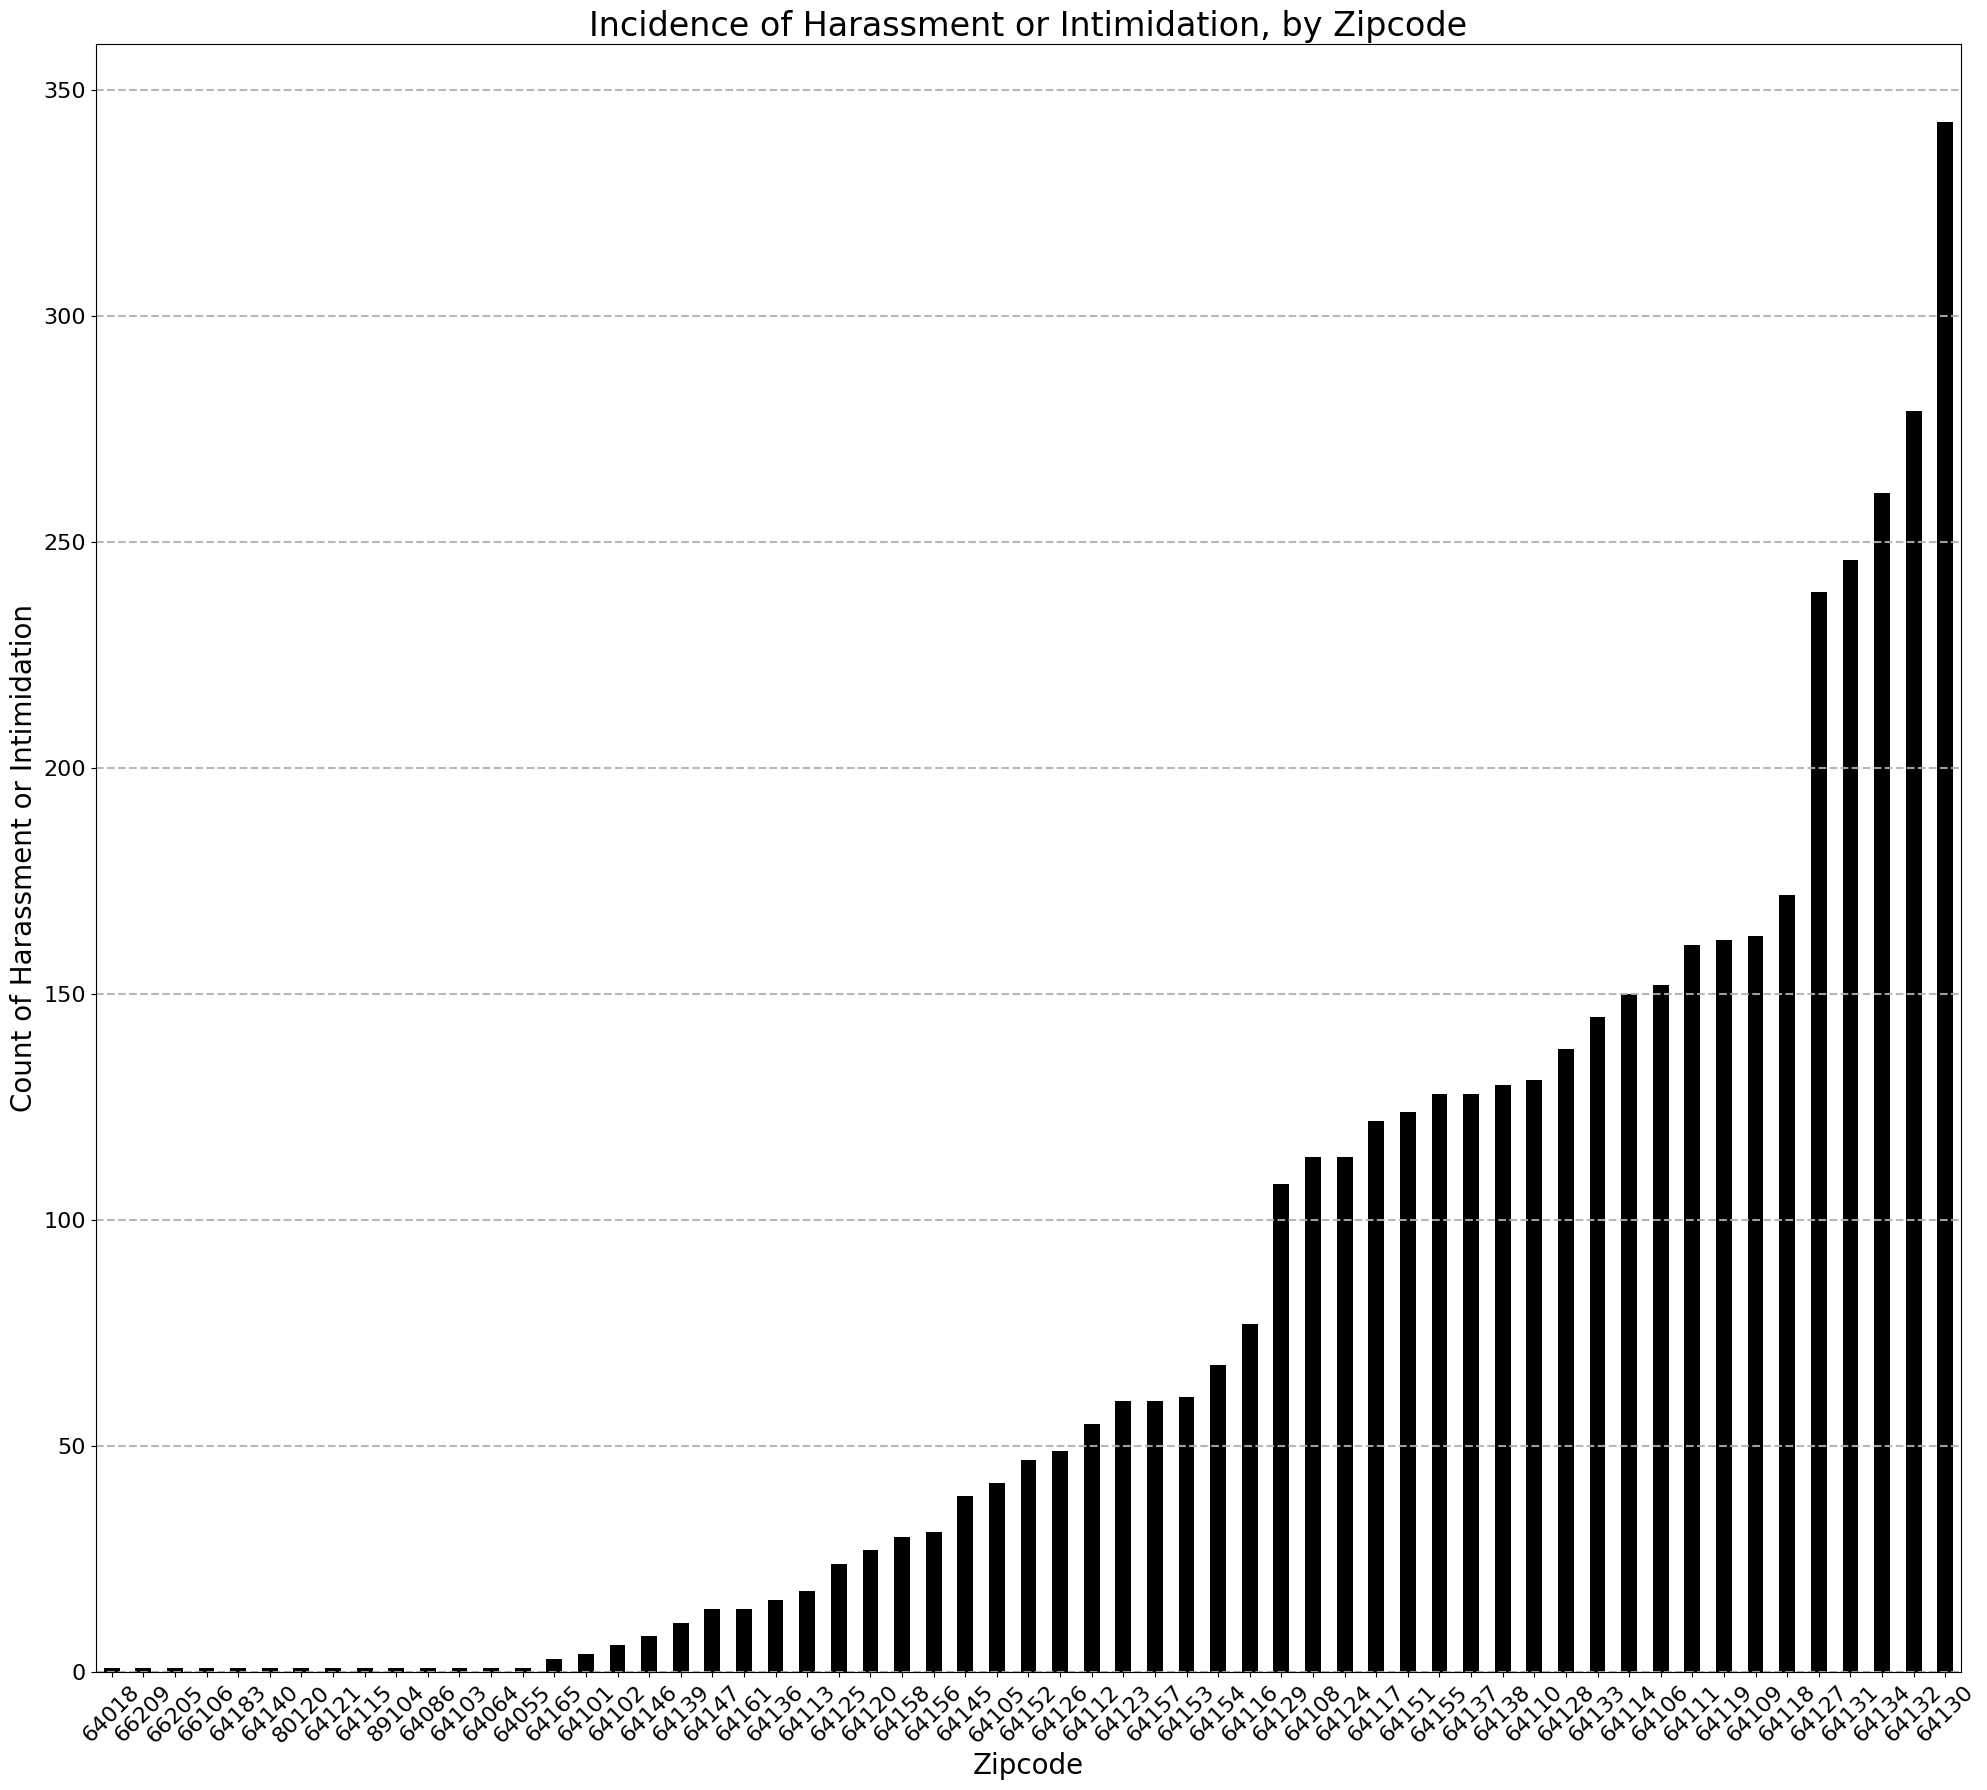

In [813]:
plt.figure(figsize=(20, 18))

zip_HarassIntim_count.plot(kind='bar', color='black')
plt.title('Incidence of Harassment or Intimidation, by Zipcode', fontsize=24) 
plt.xlabel("Zipcode", fontsize=20) 
plt.ylabel("Count of Harassment or Intimidation", fontsize=20) 
plt.xticks(rotation=45, fontsize=16)  
plt.yticks(fontsize=16)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

- "Unknown" Zipcode has the most incidences of Harassment and Intimidation.
- The 2nd most incidences of Stealing and Robbery are in Zipcode 64130.
- the 3rd most incidences of Stealing and Robbery are in Zipcode 64132
- the 4th most incidences of Stealing and Robbery are in Zipcode 64134
- the 5th most incidences of Stealing and Robbery are in Zipcode 64131
- the 6th most incidences of Stealing and Robbery are in Zipcode 64127

The Zipcodes with almost zero incidences of Harassment and Intimidation are:
- 64115
- 64121
- 89104
- 64140
- 64183
- 66106
- 66204
- 64103
- 66209
- 80120
- 64086
- 64064
- 64055
- 64018

- <h4 style="color: blue;">Rape or Sex or Molestation.</h1>

In [816]:
filtered_R_S_M_count = KS2[KS2['Offense'].str.contains('Rape|Sex|Molest', case=False)]

In [817]:
# Group by 'Zipcode' and count occurrences of filtered offenses
zip_R_S_M_count = filtered_R_S_M_count.groupby('Zipcode').size()

In [818]:
# Filter to only include those Zipcodes which also exist in filtered_Assault_count and have counts greater than 50
filtered_Assault_count = KS2[KS2['Offense'].str.contains('Assault', case=False)]
filtered_Assault_count = filtered_Assault_count.groupby('Zipcode').size()

In [819]:
# Only keep Zipcodes with Assault counts greater than 50
zip_R_S_M_count = zip_R_S_M_count[zip_R_S_M_count.index.isin(filtered_Assault_count[filtered_Assault_count > 50].index)].sort_values(ascending=True)

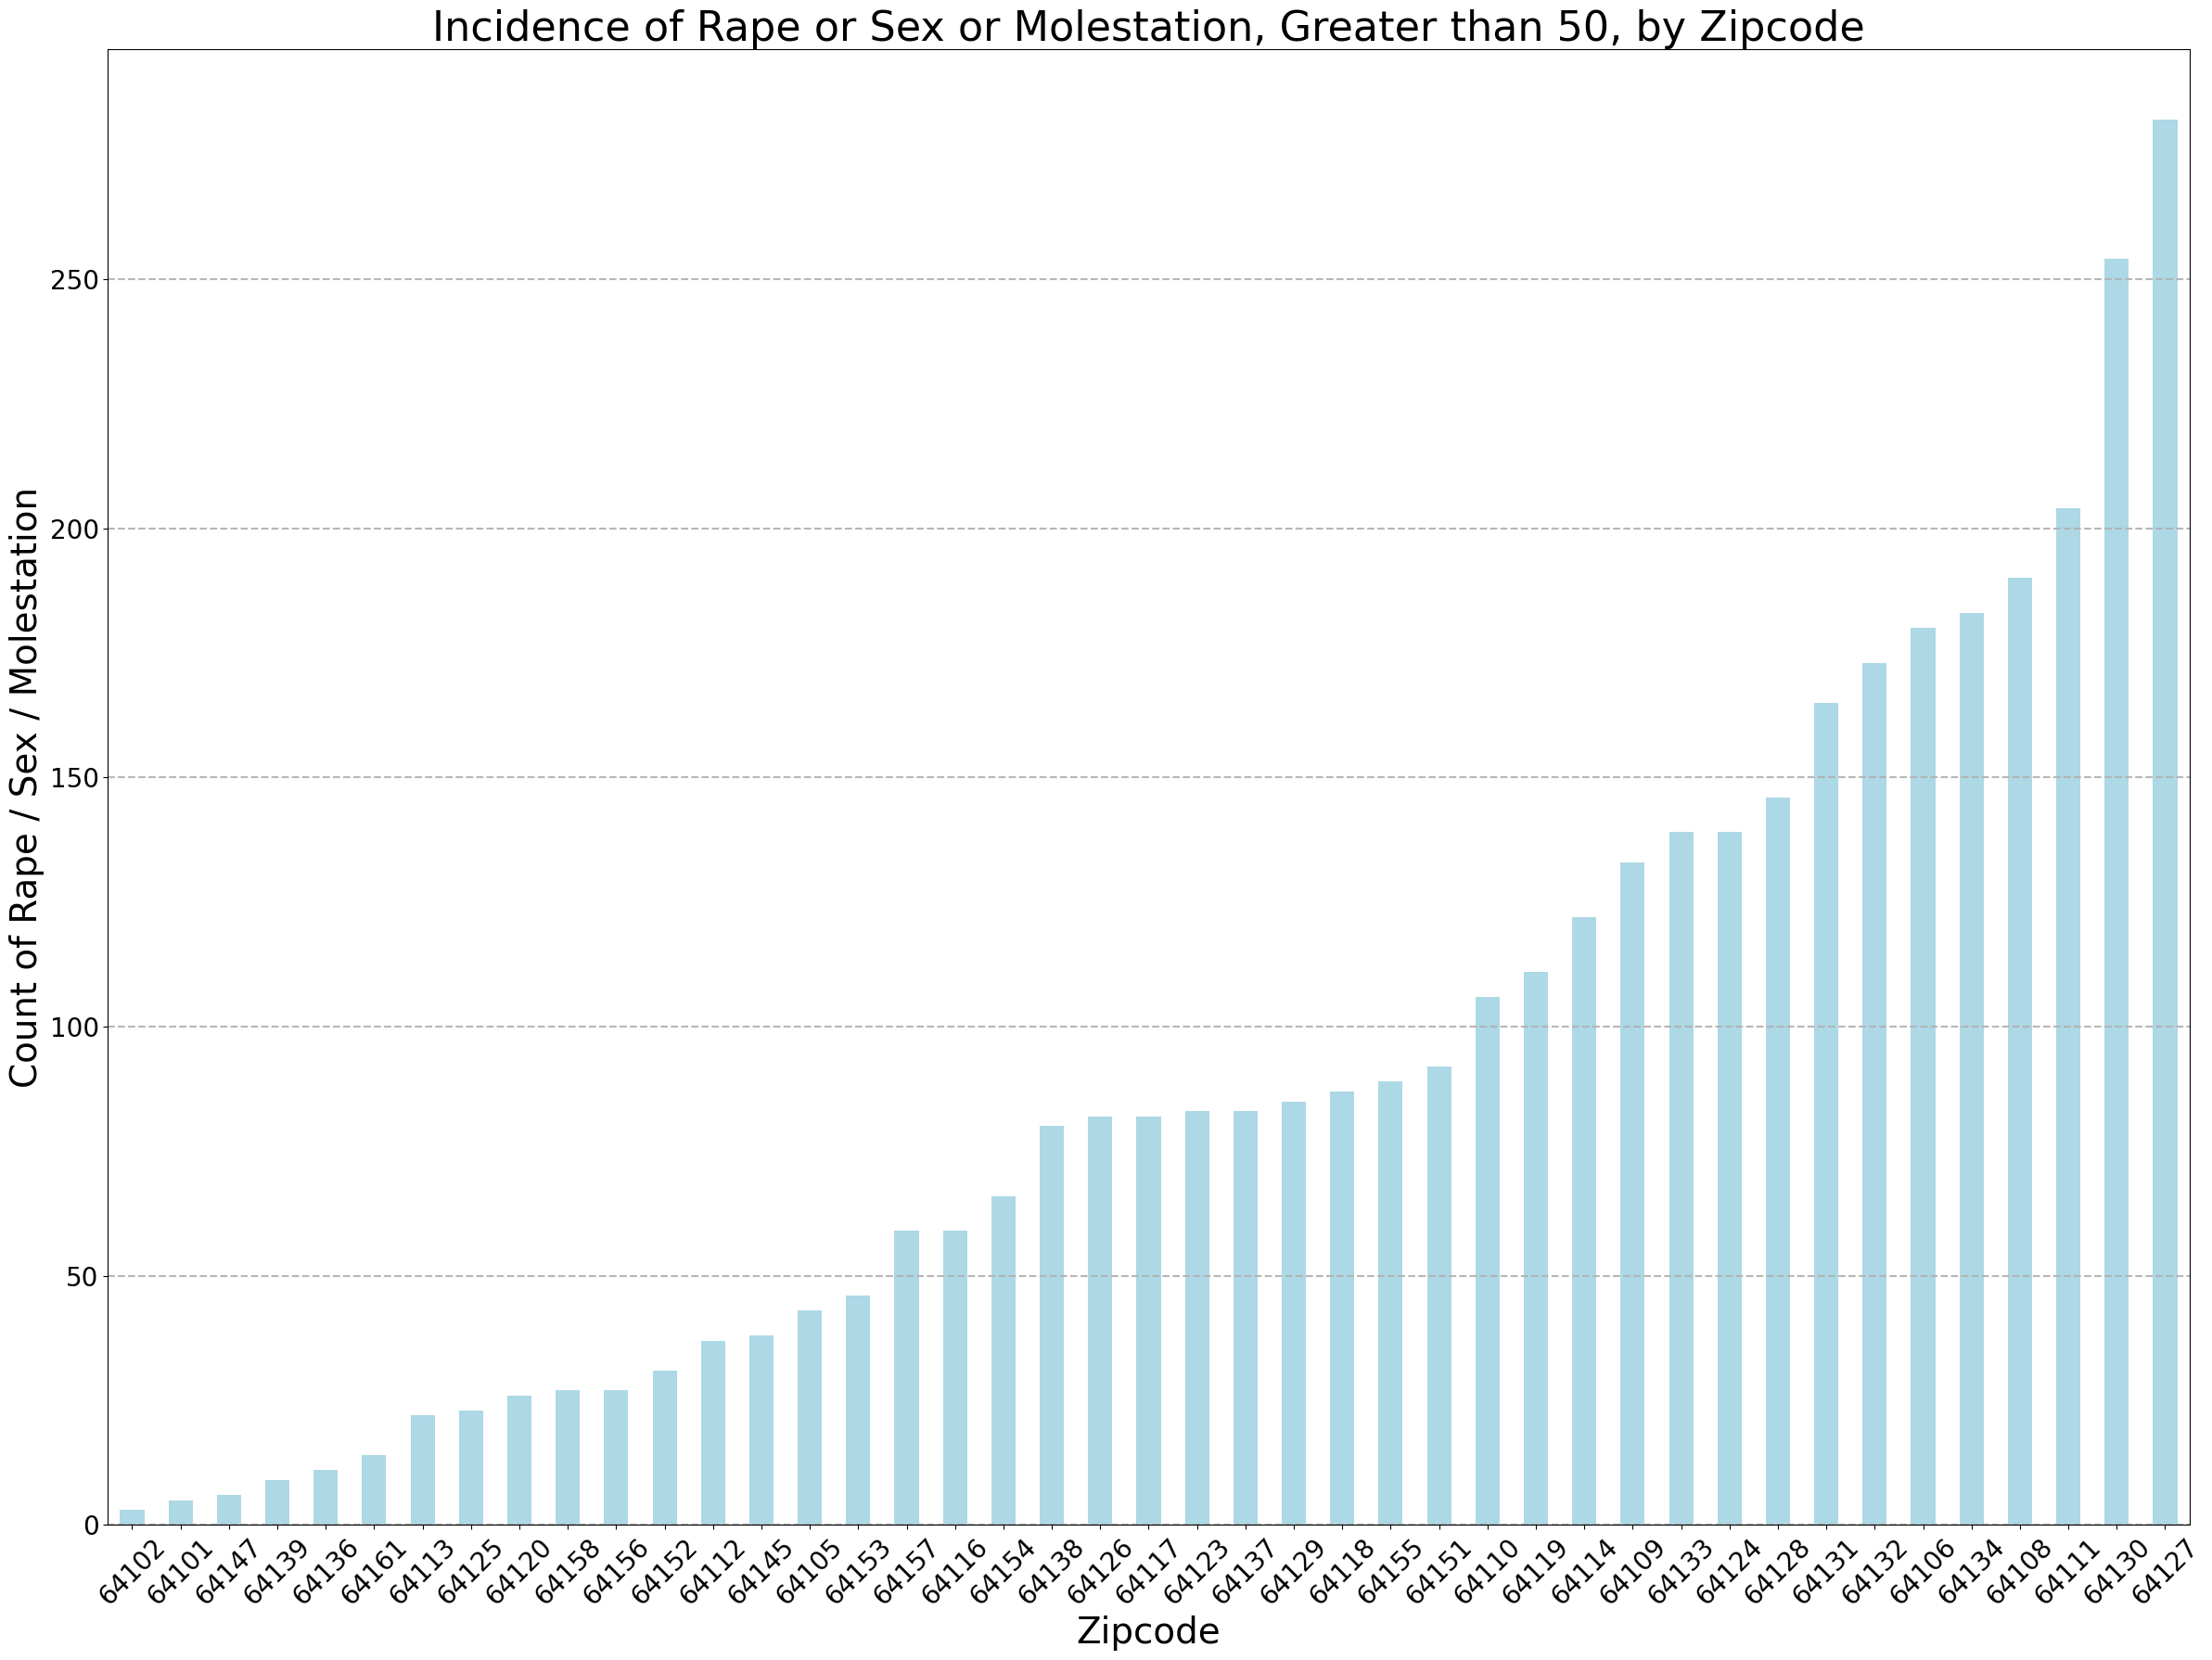

In [820]:
plt.figure(figsize=(24, 18))

zip_R_S_M_count.plot(kind='bar', color='lightblue')
plt.title('Incidence of Rape or Sex or Molestation, Greater than 50, by Zipcode', fontsize=32)
plt.xlabel("Zipcode", fontsize=28)  # Increased font size
plt.ylabel("Count of Rape / Sex / Molestation", fontsize=28)
plt.xticks(rotation=45, fontsize=20)  
plt.yticks(fontsize=20)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

Most incidences of Rape / Sex / Molestation by Zipcode

- 64127
- 64130
- 64111
- 64108
- 64134
- 64106
- 64132

Zipcodes 64127 and 64130 have much higher incidences than all other Zipcodes. 64127 has double the amount of incidences of most of the Zipcodes, and triple the amount of many of the Zipcodes.

- <h4 style="color: blue;">Assault.</h1>

In [823]:
filtered_Assault_count = KS2[KS2['Offense'].str.contains('Assault', case=False)] 
filtered_Assault_count = filtered_Assault_count.groupby('Zipcode').size()

In [824]:
# Filter only assaults greater than 50
filtered_Assault_count = filtered_Assault_count[filtered_Assault_count > 50].sort_values(ascending=True)

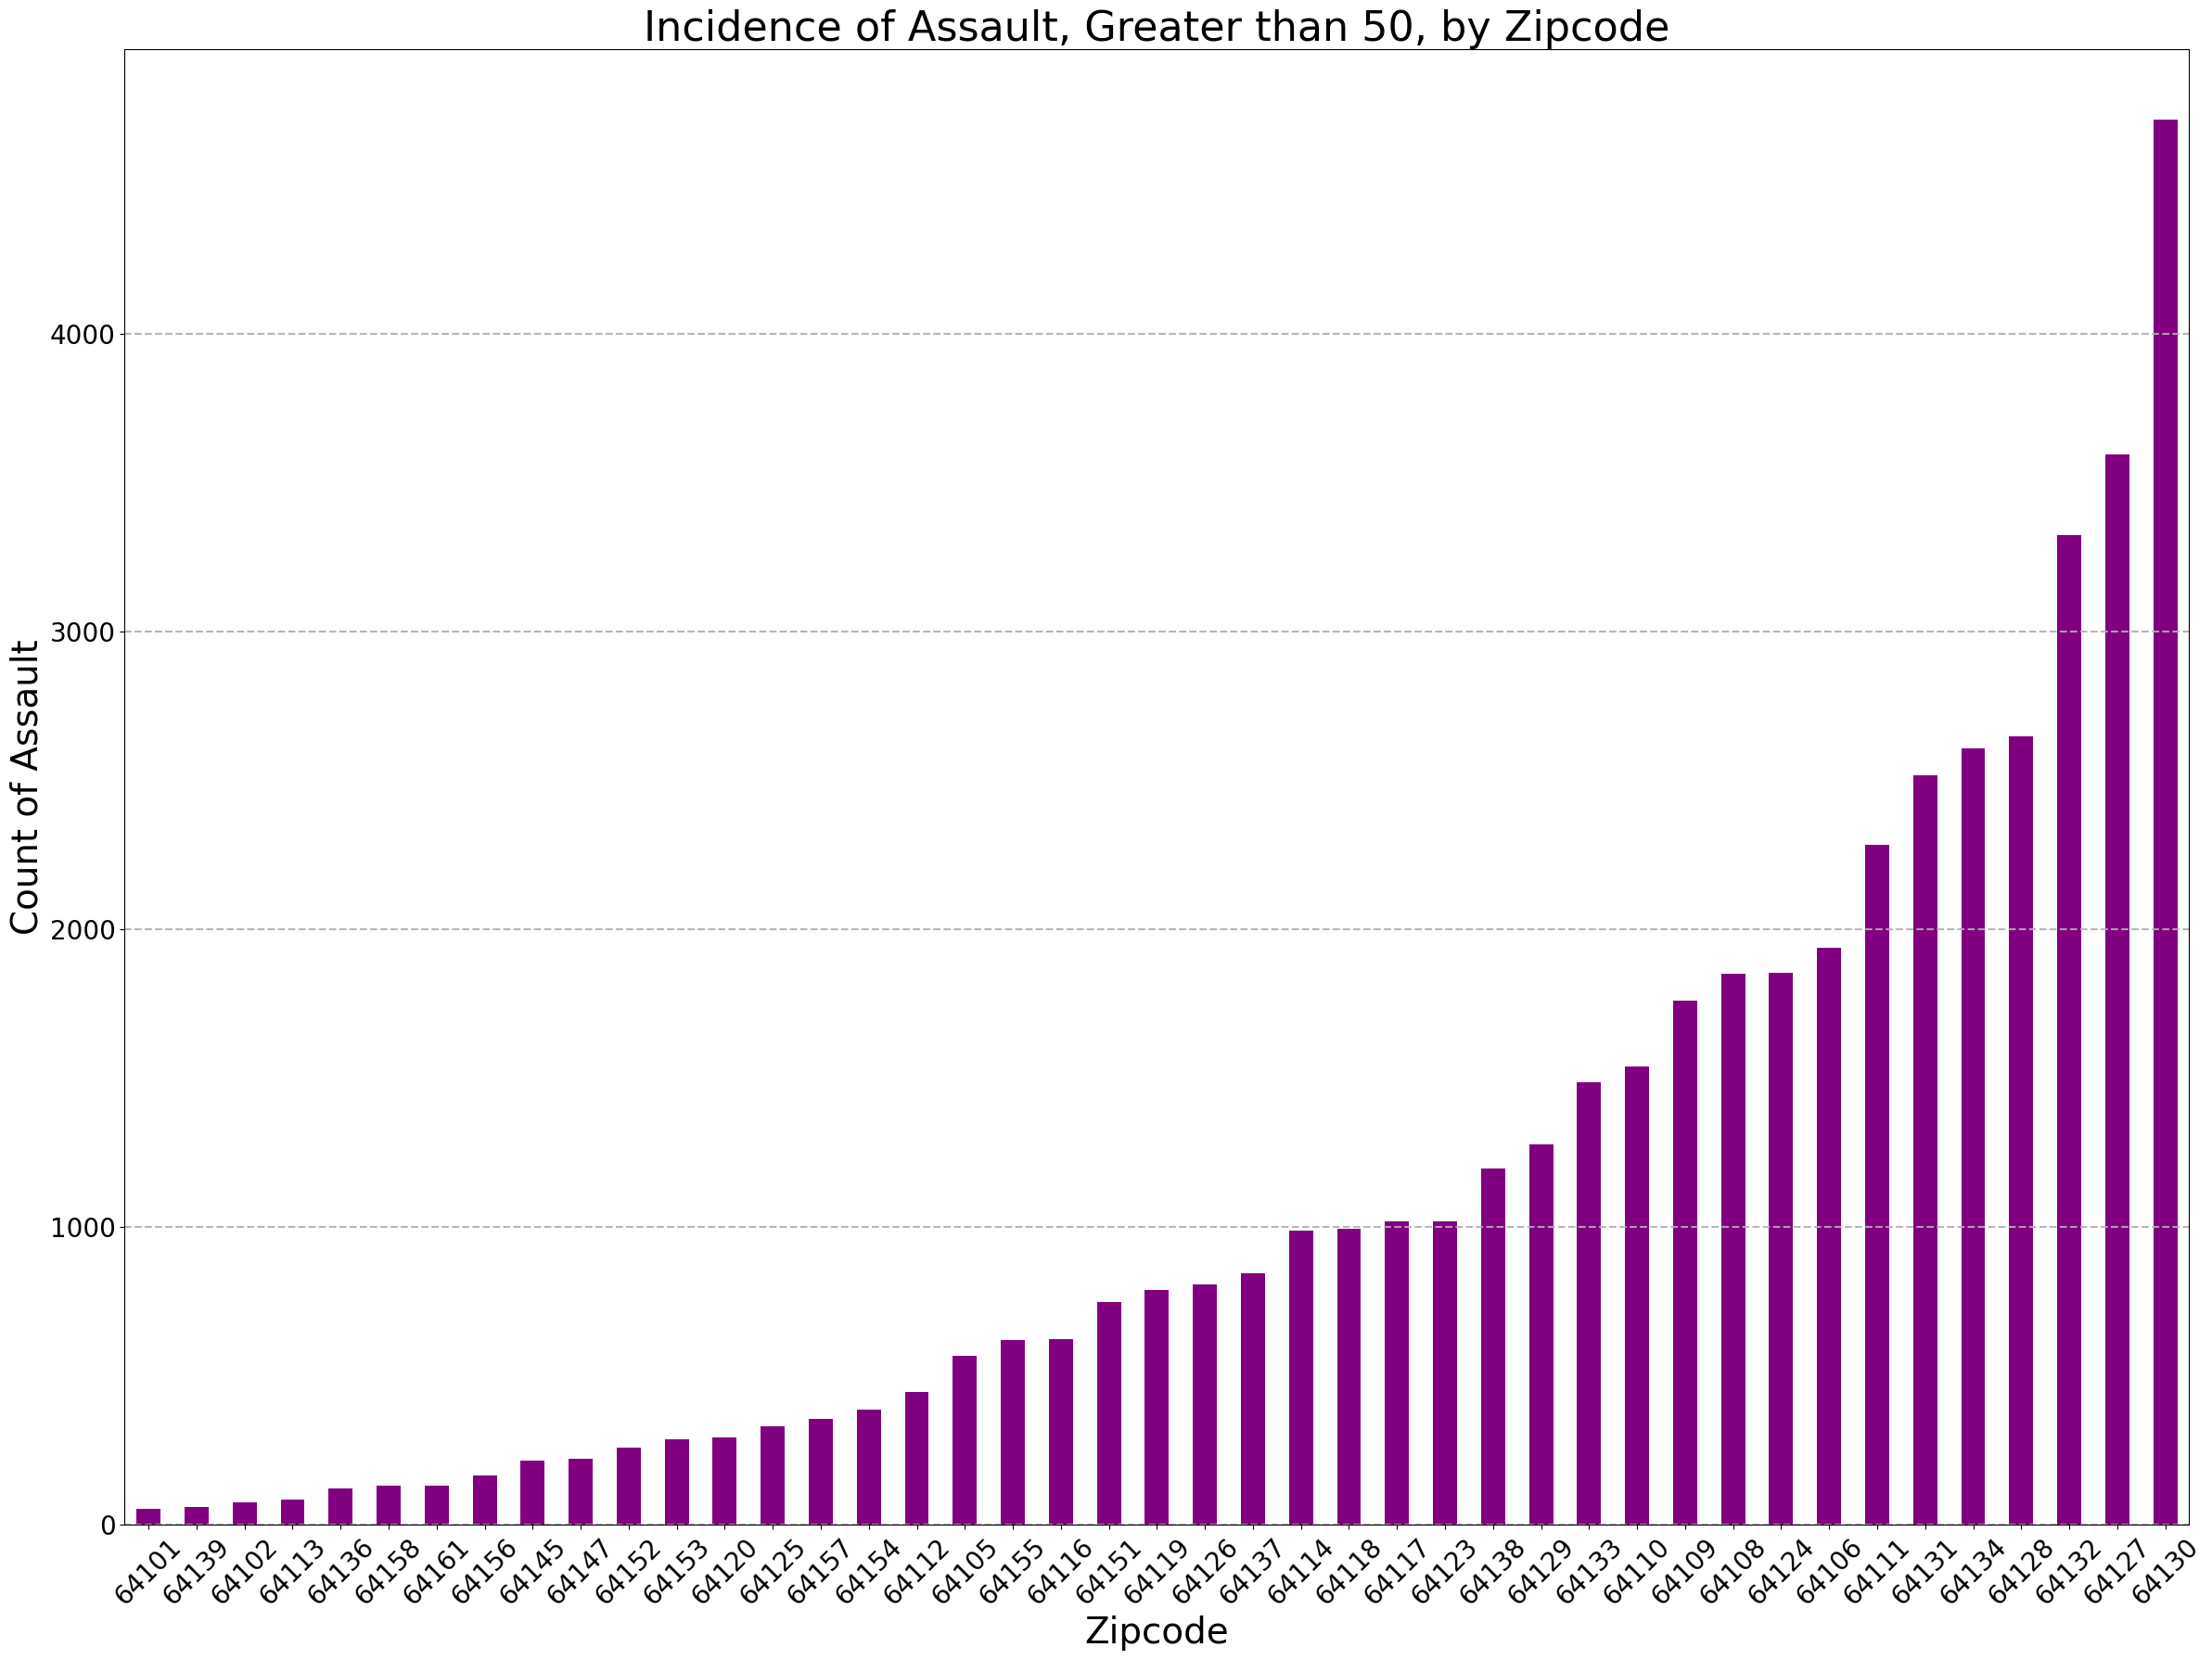

In [825]:
plt.figure(figsize=(24, 18))

filtered_Assault_count.plot(kind='bar', color='purple')
plt.title('Incidence of Assault, Greater than 50, by Zipcode', fontsize=32)
plt.xlabel("Zipcode", fontsize=28) 
plt.ylabel("Count of Assault", fontsize=28)
plt.xticks(rotation=45, fontsize=20)  
plt.yticks(fontsize=20)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

Aside from "Unknown" Zipcodes, the Zipcodes with the most incidences of Assault are:
- 64130
- 64127
- 64132
- 64128
- 64134

Again, Zipcode 64130 has double the amount of Assault incidences than most Zipcodes, and triple the amount of Assault incidences than many Zipcodes.

- <h4 style="color: blue;">Murder or Casualty.</h1>

In [828]:
filtered_Murd_Casualty_count = KS2[KS2['Offense'].str.contains('Murder|Casualty', case=False)]

In [829]:
filtered_Murd_Casualty_count = filtered_Murd_Casualty_count.groupby('Zipcode').size().sort_values(ascending=True)

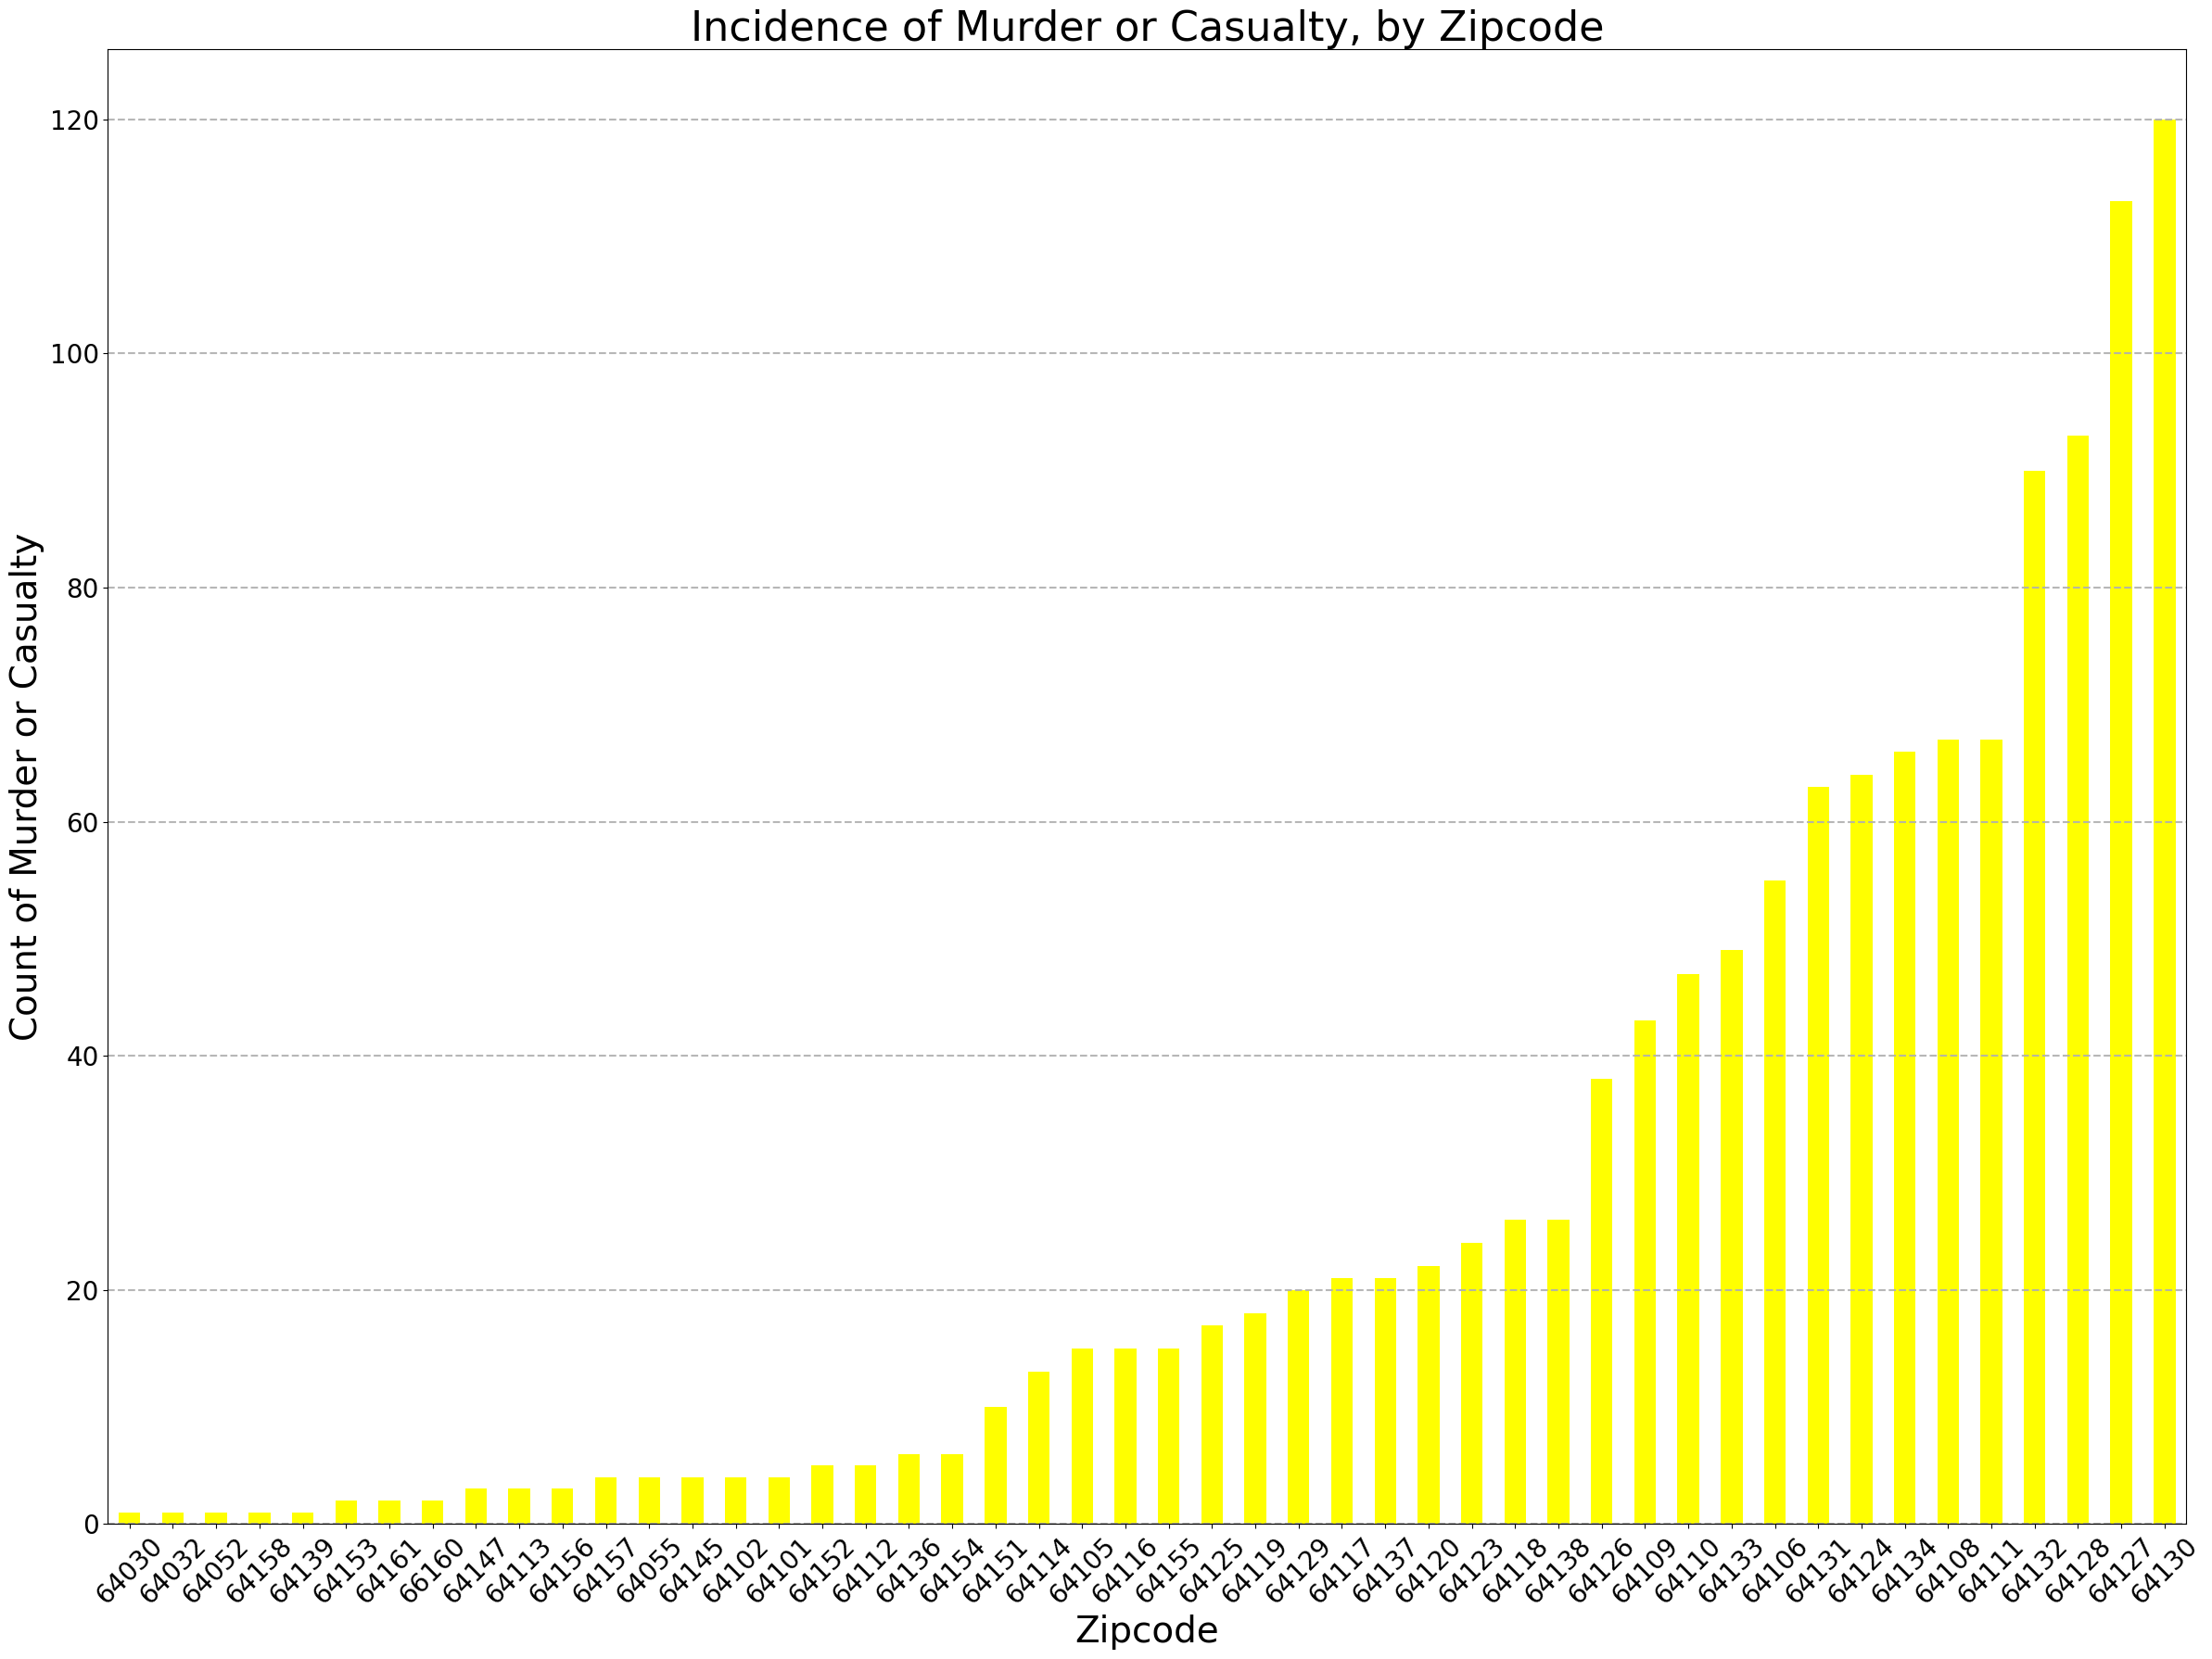

In [830]:
plt.figure(figsize=(24, 18))

filtered_Murd_Casualty_count.plot(kind='bar', color='yellow')
plt.title('Incidence of Murder or Casualty, by Zipcode', fontsize=32)
plt.xlabel("Zipcode", fontsize=28) 
plt.ylabel("Count of Murder or Casualty", fontsize=28)
plt.xticks(rotation=45, fontsize=20)  
plt.yticks(fontsize=20)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

Zipcodes with the highest incidences of Murder or Casualty:
- 64130
- 64127
- 64128
- 64132
- 64111

Again, Zipcodes 64130 and 64127 are highest in crime.

- <h4 style="color: blue;">Kidnapping or Trafficking or Missing Person.</h1>

In [833]:
filtered_Kid_Traf_Miss_count = KS2[KS2['Offense'].str.contains('Kidnapping|Trafficking|Missing', case=False)]

In [834]:
filtered_Kid_Traf_Miss_count = filtered_Kid_Traf_Miss_count.groupby('Zipcode').size().sort_values(ascending=True)

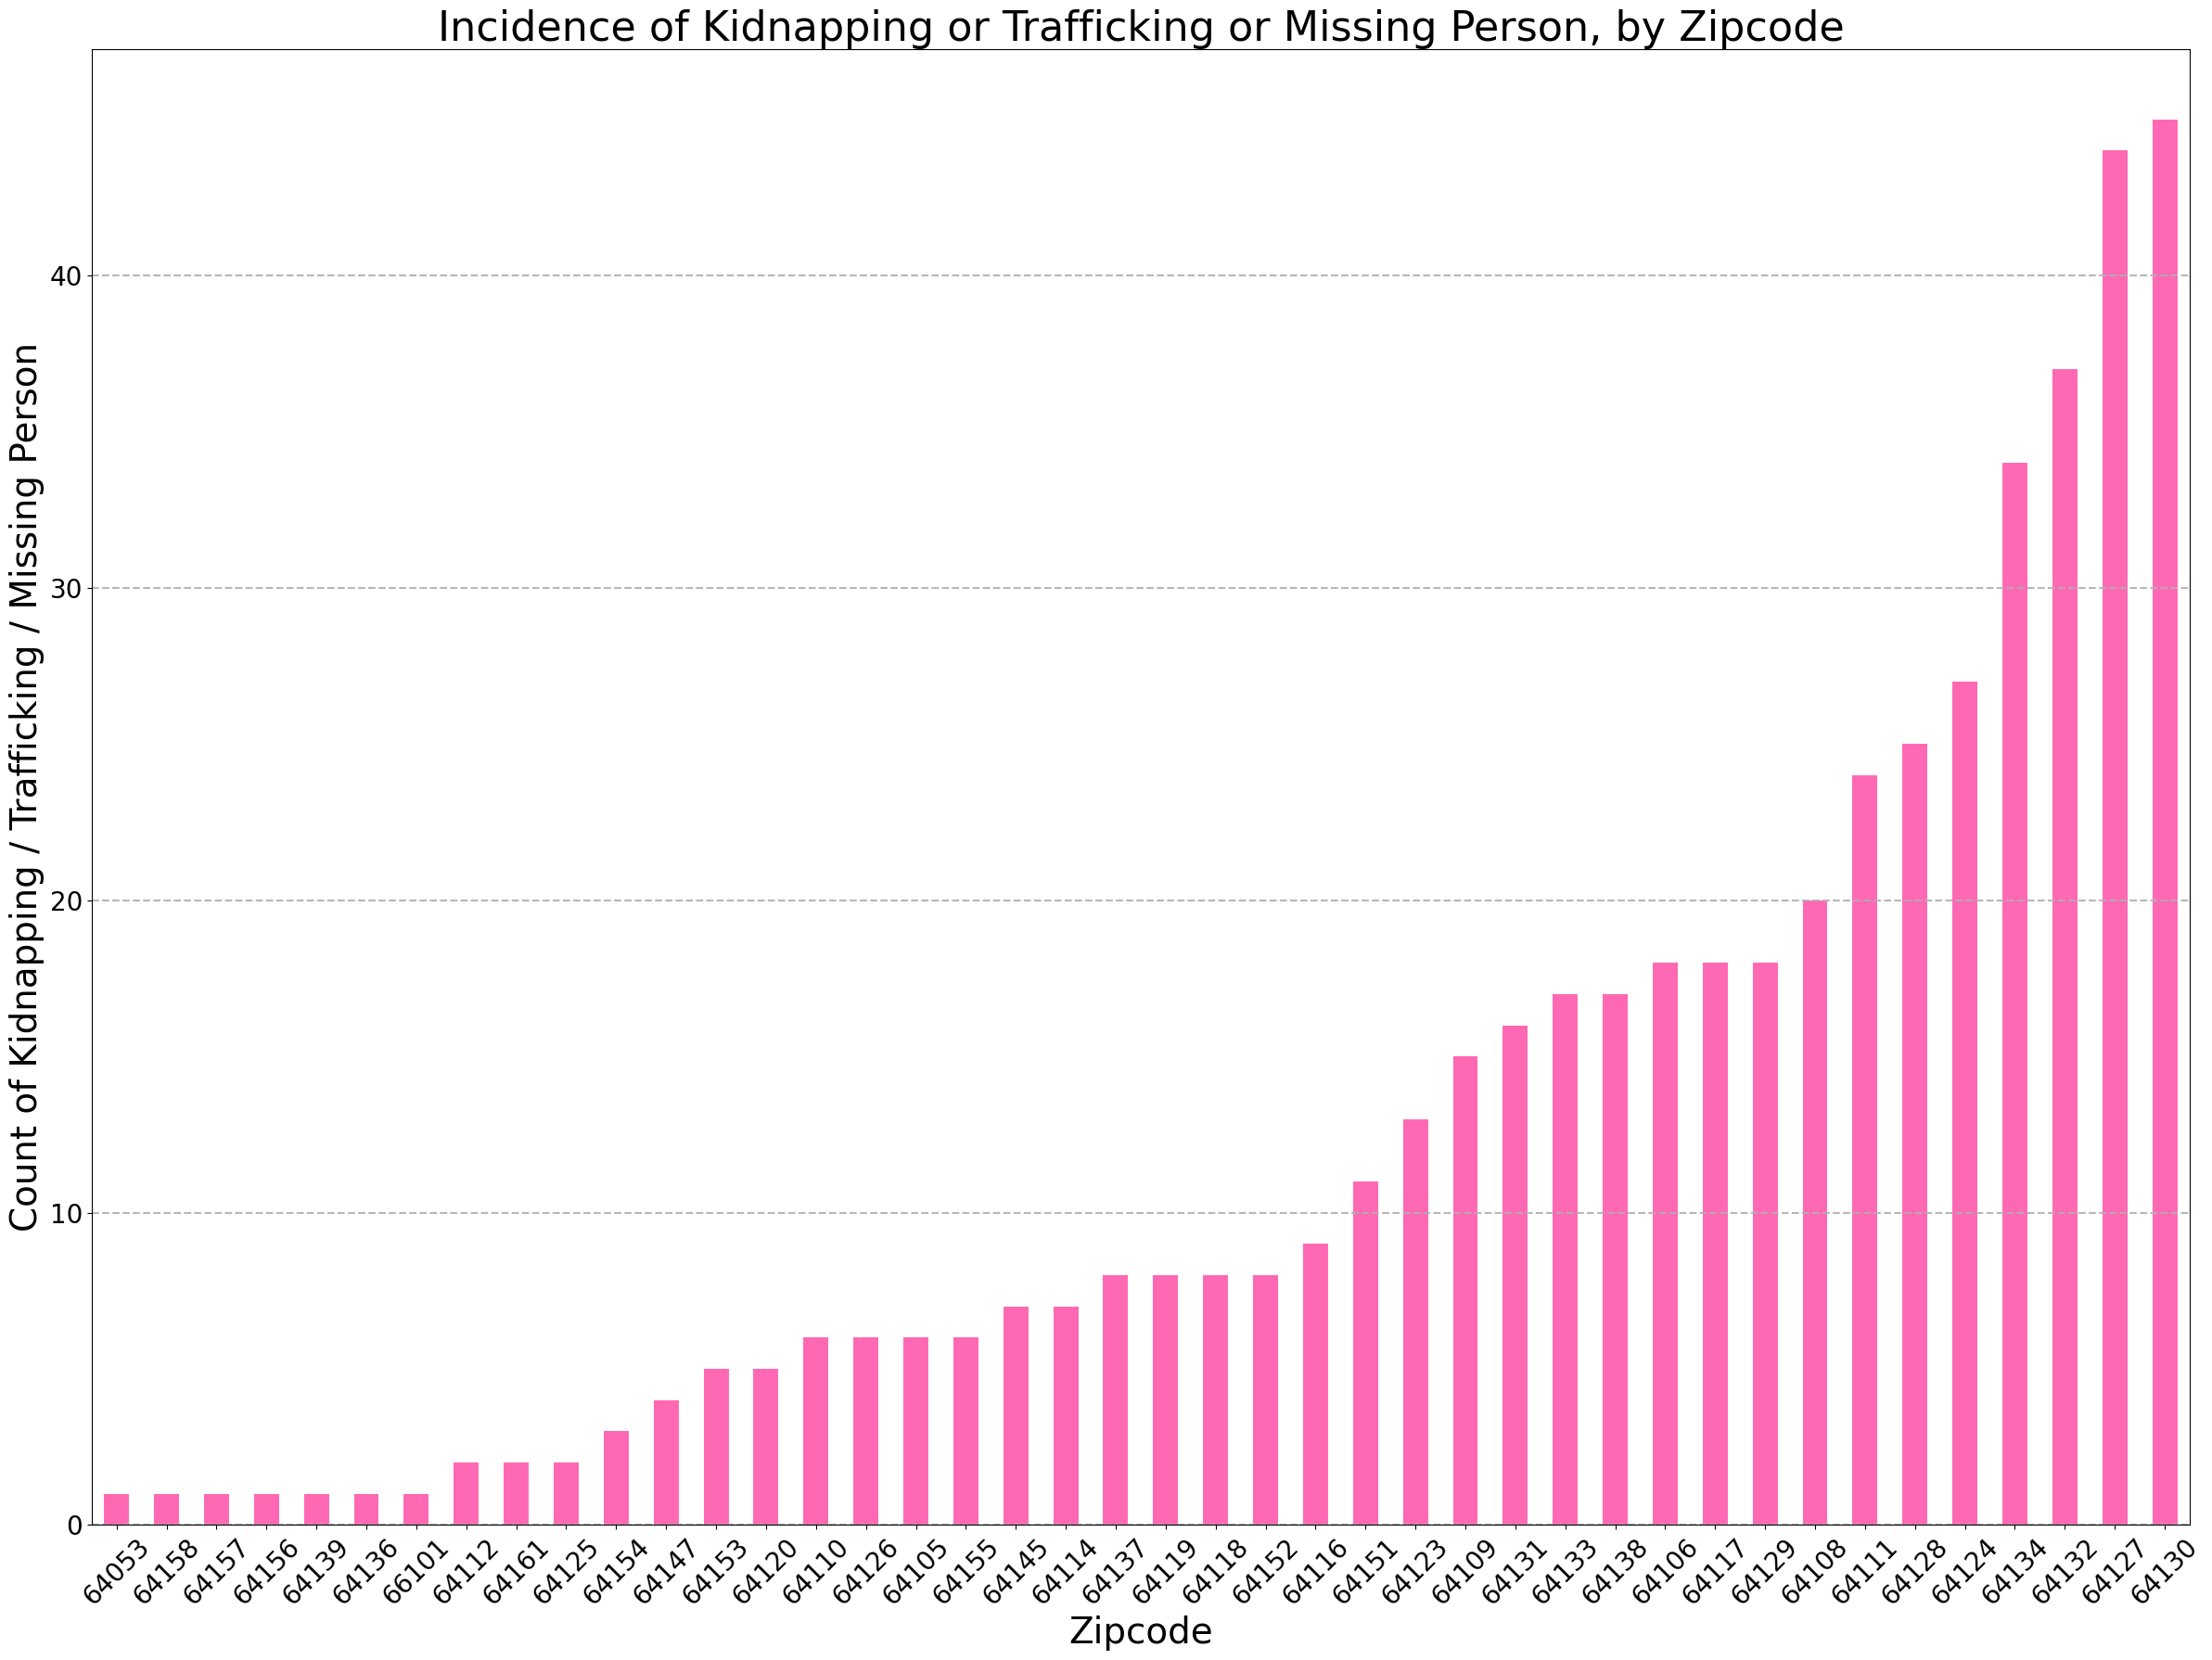

In [835]:
plt.figure(figsize=(24, 18))

filtered_Kid_Traf_Miss_count.plot(kind='bar', color='hotpink')
plt.title('Incidence of Kidnapping or Trafficking or Missing Person, by Zipcode', fontsize=32)
plt.xlabel("Zipcode", fontsize=28) 
plt.ylabel("Count of Kidnapping / Trafficking / Missing Person", fontsize=28)
plt.xticks(rotation=45, fontsize=20)  
plt.yticks(fontsize=20)  
plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.9, linewidth=1.5)

plt.show()

The highest amount of incidences of Kidnapping, Trafficking, or Missing Persons is from Zipcode 64130.

These are the Zipcodes with the highest incidences:
- 64130
- 64127
- 64132
- 64134
- 64124

Again, Zipcodes 64130 ad 64127 top the charts.

<h1 style="color: blue;">Predictive Model</h1>

In [838]:
KS2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 286082 entries, 2 to 522904
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Reported_Date  286082 non-null  datetime64[ns]
 1   Reported_Time  286082 non-null  datetime64[ns]
 2   From_Date      286082 non-null  datetime64[ns]
 3   Offense        286082 non-null  object        
 4   Description    286082 non-null  object        
 5   Beat           286082 non-null  object        
 6   Address        286082 non-null  object        
 7   City           286082 non-null  object        
 8   Zipcode        286082 non-null  int64         
 9   Rep_Dist       286082 non-null  object        
 10  Area           286082 non-null  object        
 11  DVFlag         286082 non-null  object        
 12  FireArmUsed    286082 non-null  bool          
 13  Location       286082 non-null  object        
 14  Geo_Location1  286082 non-null  object        
dtypes: bo

In [839]:
display(KS2.head(5))

,Reported_Date,Reported_Time,From_Date,Offense,Description,Beat,Address,City,Zipcode,Rep_Dist,Area,DVFlag,FireArmUsed,Location,Geo_Location1
2,2019-04-25,1900-01-01 20:51:00,2019-04-25,City/Municipal Warrant Arrest,No Description,999,00 S WATER ST,LIBERTY,64068,Unknown,OSPD,N,False,Unknown,POINT (-94.419408416 39.245010036)
6,2019-04-12,1900-01-01 09:31:00,2019-04-08,Stolen Auto,Motor Vehicle Theft,Unknown,4500 S BENTON,KANSAS CITY,64130,Unknown,Unknown,N,False,Unknown,POINT (-94.551136007 39.044326017)
7,2019-05-09,1900-01-01 13:15:00,2018-09-17,Forgery,Counterfeiting / Forgery,533,10700 STATE LINE RD,KANSAS CITY,64114,Unknown,Unknown,N,False,Unknown,POINT (-94.608049968 38.925709911)
8,2019-06-22,1900-01-01 14:10:00,2019-06-22,Stealing - Shoplifting,Shoplifting,231,7900 STATE LINE RD,KANSAS CITY,64114,Unknown,MPD,N,False,Unknown,POINT (-94.608049968 38.925709911)
9,2019-09-24,1900-01-01 11:06:00,2019-09-24,City/Municipal Warrant Arrest,No Description,999,00 S WATER ST,LIBERTY,64068,Unknown,OSPD,N,False,Unknown,POINT (-94.419408416 39.245010036)


In [840]:
print(KS2.Location.value_counts().head(15))

Location
Unknown                                                              37328
POINT (-94.44114 39.04643)                                            1010
POINT (-94.441099599 39.046482123)                                     901
POINT (-94.657201087 39.250189469)                                     778
1100  TROOST AVE\nKANSAS CITY 64106\n(39.10068, -94.569846)            453
POINT (-94.583430529 39.068442506)                                     376
2300  E MEYER BLVD\nKANSAS CITY 64132\n(39.007141, -94.559903)         366
2300  HOLMES ST\nKANSAS CITY 64108\n(39.084583, -94.575809)            343
POINT (-94.557774977 39.008867004)                                     315
2600  PROSPECT AVE\nKANSAS CITY 64127\n(39.078772, -94.552412)         280
POINT (-94.576183983 39.084744979)                                     276
100  E LINWOOD BLVD\nKANSAS CITY 64111\n(39.068419, -94.584002)        274
8500  N BOARDWALK AVE\nKANSAS CITY 64154\n(39.252223, -94.655534)      273
POINT (-94.58351

- <h4 style="color: blue;">Define target column.</h1>

In [842]:
# Define the target variable
target_column = 'FireArmUsed'

In [843]:
print(KS2[target_column].value_counts())

FireArmUsed
False    271299
True      14783
Name: count, dtype: int64


- <h4 style="color: blue;">Define features.</h1>

In [845]:
features_to_drop = ['Reported_Time', 'From_Date', 'Rep_Dist', 'Address', 'Location', 'Geo_Location1', target_column]

In [846]:
X = KS2.drop(features_to_drop, axis=1)
y = KS2[target_column]

In [847]:
# Fill missing categorical values with 'Unknown'
categorical_cols = ['Beat', 'DVFlag', 'Offense', 'Description', 'City', 'Area']
X[categorical_cols] = X[categorical_cols].fillna('Unknown')

- <h4 style="color: blue;">Convert datetime columns to numerical.</h1>

In [849]:
if 'Reported_Date' in KS2.columns:
    # Convert 'Reported_Date' to datetime first 
    KS2['Reported_Date'] = pd.to_datetime(KS2['Reported_Date'], errors='coerce')
    
    # Convert datetime columns to numerical features
    X['Reported_Year'] = KS2['Reported_Date'].dt.year
    X['Reported_Month'] = KS2['Reported_Date'].dt.month
    X['Reported_Day'] = KS2['Reported_Date'].dt.day
    X['Reported_DayOfWeek'] = KS2['Reported_Date'].dt.dayofweek  # Numeric representation

In [850]:
X.drop(columns=['Reported_Date'], inplace=True)

Monday=0
<br>
Tuesday=1
<br>
Wednesday=2
<br>
Thursday=3
<br>
Friday=4
<br>
Saturday=5
<br>
Sunday=6

In [852]:
# Print the column types to check for any non-numeric values
print(X.dtypes)

Offense               object
Description           object
Beat                  object
City                  object
Zipcode                int64
Area                  object
DVFlag                object
Reported_Year          int32
Reported_Month         int32
Reported_Day           int32
Reported_DayOfWeek     int32
dtype: object


- <h4 style="color: blue;">Get dummies.</h1>

In [1041]:
print(KS2.shape) 

(286082, 15)


In [1043]:
# Prepare to encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),  # Ignore unknown
    ],
    remainder='passthrough'  # Keep all non-specified columns
)

In [1045]:
# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

- <h4 style="color: blue;">Split the data in to test, train.</h1>

In [1048]:
# Split into training and temp sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #80% training. 

In [1050]:
print(KS2.dtypes.head(20))

Reported_Date    datetime64[ns]
Reported_Time    datetime64[ns]
From_Date        datetime64[ns]
Offense                  object
Description              object
Beat                     object
Address                  object
City                     object
Zipcode                   int64
Rep_Dist                 object
Area                     object
DVFlag                   object
FireArmUsed                bool
Location                 object
Geo_Location1            object
dtype: object


- <h4 style="color: blue;">Train the model.</h1>

In [1053]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Beat', 'DVFlag', 'Offense',
                                                   'Description', 'City',
                                                   'Area'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

- <h4 style="color: blue;">Make predictions.</h1>

In [1056]:
y_pred = model.predict(X_test)

- <h4 style="color: blue;">Test and score the model.</h1>

In [1059]:
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9723


- <h4 style="color: blue;">Store the predicted values as to whether or not FireArmUsed is 'True'.</h1>

In [1062]:
# Add predictions to test set for further analysis
X_test['Predicted_FireArmUsed'] = y_pred

In [1064]:
# Group by Zipcode and Reported DayOfWeek to see counts of predicted True
predictions_summary = X_test[X_test['Predicted_FireArmUsed']].groupby(['Zipcode', 'Reported_DayOfWeek']).size().reset_index(name='Count')

In [1066]:
# Display the predictions summary
print(predictions_summary.sort_values(by='Count', ascending=False))

     Zipcode  Reported_DayOfWeek  Count
165    64130                   6     67
163    64130                   4     56
164    64130                   5     54
138    64127                   0     51
144    64127                   6     48
159    64130                   0     48
162    64130                   3     43
142    64127                   4     43
160    64130                   1     43
188    64134                   1     39
178    64132                   5     38
193    64134                   6     37
122    64124                   5     36
173    64132                   0     36
143    64127                   5     36
175    64132                   2     36
161    64130                   2     35
145    64128                   0     35
140    64127                   2     34
139    64127                   1     31
148    64128                   3     31
189    64134                   2     31
149    64128                   4     31
141    64127                   3     30


Monday=0
<br>
Tuesday=1
<br>
Wednesday=2
<br>
Thursday=3
<br>
Friday=4
<br>
Saturday=5
<br>
Sunday=6

<h1 style="color: blue;">Conclusion</h1>

## Top Zipcodes for Highest Crime Incidence

The following Zipcodes are consistently at the top for the highest incidence of crime across nearly every category:

- 64130
- 64127

Both of these Zipcodes are located in the East Police Department Division.
                                                  
---
## Crime Categories with Highest Incidence Rates
- The Zipcodes 64130 and 64127 have **double the incidence rate** compared to most other Zipcodes in these categories:
  - **Domestic Violence**
  - **Firearm Used**
  - **Rape or Sexual Assault**
  - **Assault**
  - **Murder or Casualty**
  - **Kidnapping, Trafficking, or Missing Person**
                                                  
---
## Additional Insights
- **64130** and **64132** demonstrate the highest incidences of crime in **harassment or intimidation**, with **double the incidence rate** than most other Zipcodes.
- Even though **64127** is not at the very top for this category, it still shows double the incidence rate compared to nearly all other Zipcodes.

---
## Notable Incidence
- 64111 records the highest incidences for:
  - **Stealing or Robbery**

___
## Model
- The model has predicted, with 97% accuracy.

## Prediction of FireArmUsed by Zipcode and Day of Week:

     Zipcode  Reported_DayOfWeek  Count
165    64130                   6     67
163    64130                   4     56
164    64130                   5     54
138    64127                   0     51
144    64127                   6     48
159    64130                   0     48
162    64130                   3     43
142    64127                   4     43

Monday=0
Tuesday=1
Wednesday=2
Thursday=3
Friday=4
Saturday=5
Sunday=6

- Zipcodes 64130 and 64127 have the highest count of FireArmUsed. 
- Sundays, in Zipcode 64130,  have the most incidences of FireArmUsed, at the count of 67.
- Fridays, in Zipcode 64130 have the 2nd most incidences, at 56, followed by Saturdays, at a count of 54.

- Mondays, in Zipcode 64127 is runner up, with the count being 51, followed by Sundays, at a count of 48.

- Tuesdays, in Zipcode 64134 is next highest, with the count being 39, followed by Saturdays, in Zipcode 64132, at the count of 38.

- Tuesdays and Wednesdays did not make it in to the top 10.
- Wednesdays did not make it in to the top 15.

To sum up the report, customers should be wary in Zipcodes 64130, 64127, 64130, and 64132.
